In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import pandas as pd

import pickle

plt.rcParams["figure.figsize"] = (15,10)

We choose to work on the LHC dataset.
<br>And I will be specifically working on the Low pt dataset (250-500).

In [2]:
higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs

<_io.BufferedReader name='higgs_100000_pt_250_500.pkl'>

In [3]:
qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd

<_io.BufferedReader name='qcd_100000_pt_250_500.pkl'>

In [4]:
data_higgs = pickle.load(higgs)
data_higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [5]:
data_qcd = pickle.load(qcd)
data_qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [6]:
higgs.close()
qcd.close()

In [7]:
data_higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [8]:
data_qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


The general image of a collision is that of particle entering on the beam axis (coventionally labeled the Z axis) and resulting particles leaving as a jet (or multiple jets grouped together) at an angle with respect to the beam axis. 
<br>In simple terms, a jet is a cone shaped volume formed by trajectories of various scattered particles.
<br>We have (simulated) signal data of Higgs bosons decaying into bottom quark-antiquark pairs, but also qcd background data contamination because lots of other kinds of particle collisions could also occur.

Before digging into our data, we'll give a rundown on what each of the label means:

pT($pT$): Transverse Momentum. The momentum vector orthogonal to the beam direction (Z), a vector sum of the momentum in X and Y directions.


eta($\eta$): Psuedorapidity. $\eta = ln(cot(\frac{\theta}{2}))$, where $\theta$ is the polar angle from 0 to 180. Thus, Psuedorapidity can be seen as an equivalent information of the direction the jet with respect to the beam.


phi($\phi$): Azimuthal angle. The angle of the jet, if projected onto a plane orthogonal to the beam. Ranges from -180 to +180.


mass: The mass of the particle.


ee2: Two point energy correlation function.
<br>ee3: Three point energy correlation function
<br>d2: ee3 / (ee2^3)
<br>An n-point energy correlation function defines the probability of finding another (n-1) signals given the known signal.
<br>Thus, a larger value equals to a higher probability of jets being close together.


angularity: Higher angularity corresponds to more asymmetrical decays.


t1($\tau_1$): 1-subjettiness: The value corresponding to if the jet is seen as one entire jet.
<br>t2($\tau_2$): 2-subjettiness: The value corresponding to if the jet is seen as two separate jets.
<br>t3($\tau_3$): 3-subjettiness: The value corresponding to if the jet is seen as three separate jets.
<br>t21($\tau_{21}$): $\frac{\tau_2}{\tau_1}$.
<br>t32($\tau_{32}$): $\frac{\tau_3}{\tau_2}$.
<br>(If the ratio of $\frac{\tau_j}{\tau_i}$ is small, then we can confidently conclude that the jet is composed of j sub-jets.)


KtDeltaR($k_t\Delta R$): Distance between of two subjects within the large jet.

# 1.

We've loaded our data, so we'll see how the signal and background data compare for each feature.

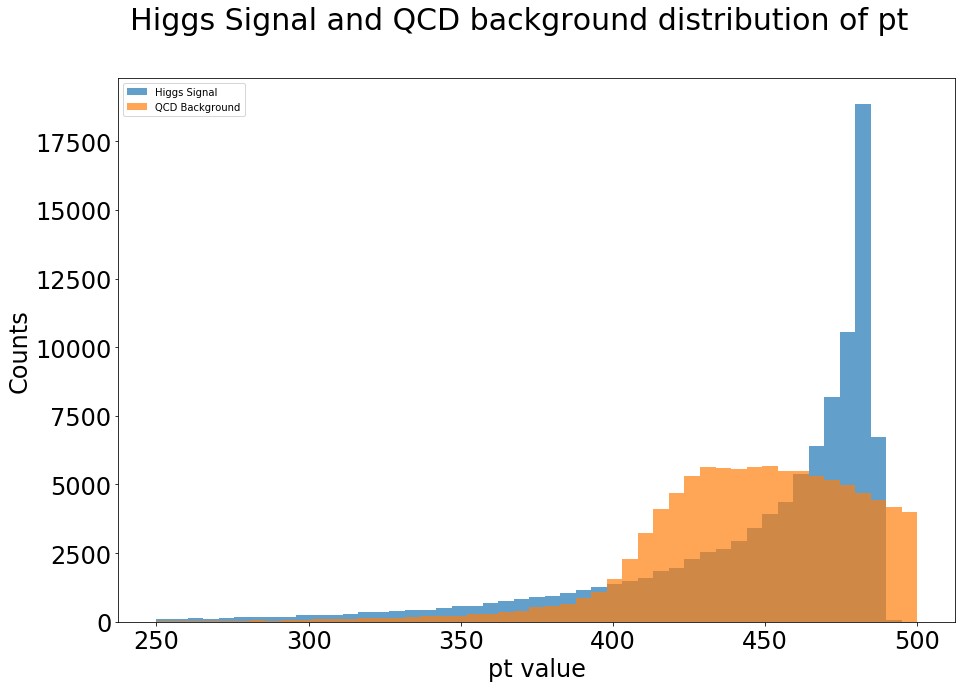

In [46]:
plt.suptitle('Higgs Signal and QCD background distribution of pt ', fontsize=30)
plt.xlabel('pt value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

It would appear that the mean of the pT distribution for Higgs is a much sharper distribution than QCD.
<br>Makes sense because the Higgs decay we're looking for decays to specific particles, which explains the narrow range of possible momentum in the XY-plane.

In [78]:
print(np.max(data_higgs['eta']))
print(np.min(data_higgs['eta']))
print(np.max(data_qcd['eta']))
print(np.min(data_qcd['eta']))

3.264194698314869
-3.202213162003274
3.192602898050439
-3.240244155525688


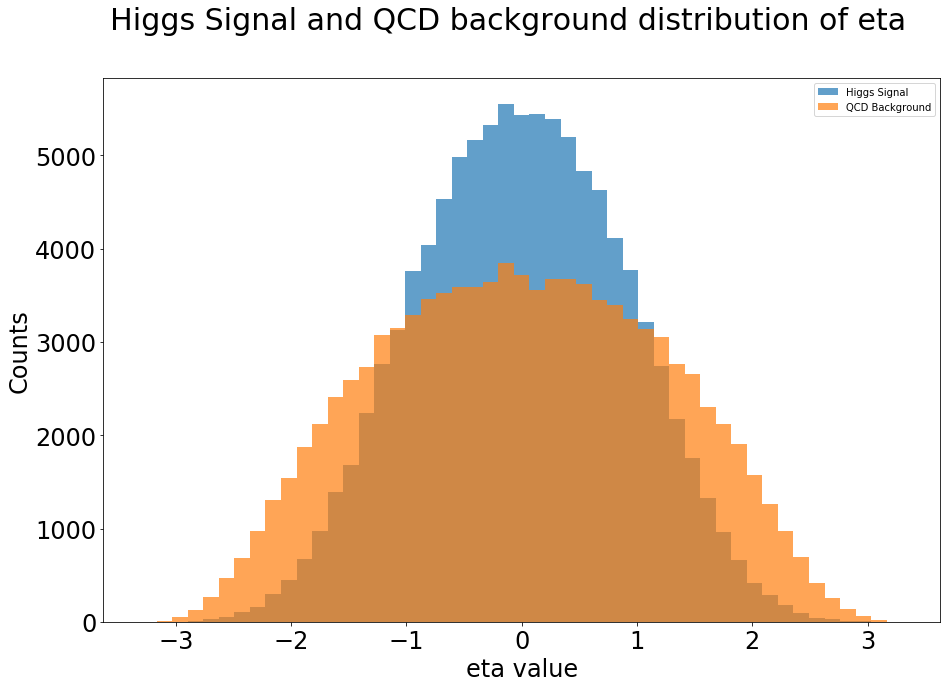

In [127]:
plt.suptitle('Higgs Signal and QCD background distribution of eta', fontsize=30)
plt.xlabel('eta value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

It would appear that for both signal and background, most of the jets are ejected orthogonal to the beam.
<br>However, signal jets are ejected closer to the orthogonal direction than background ones.

In [82]:
print(np.max(data_higgs['phi']))
print(np.min(data_higgs['phi']))
print(np.max(data_qcd['phi']))
print(np.min(data_qcd['phi']))

3.1414441448832293
-3.141586635679087
3.1415720573843084
-3.1415368791145792


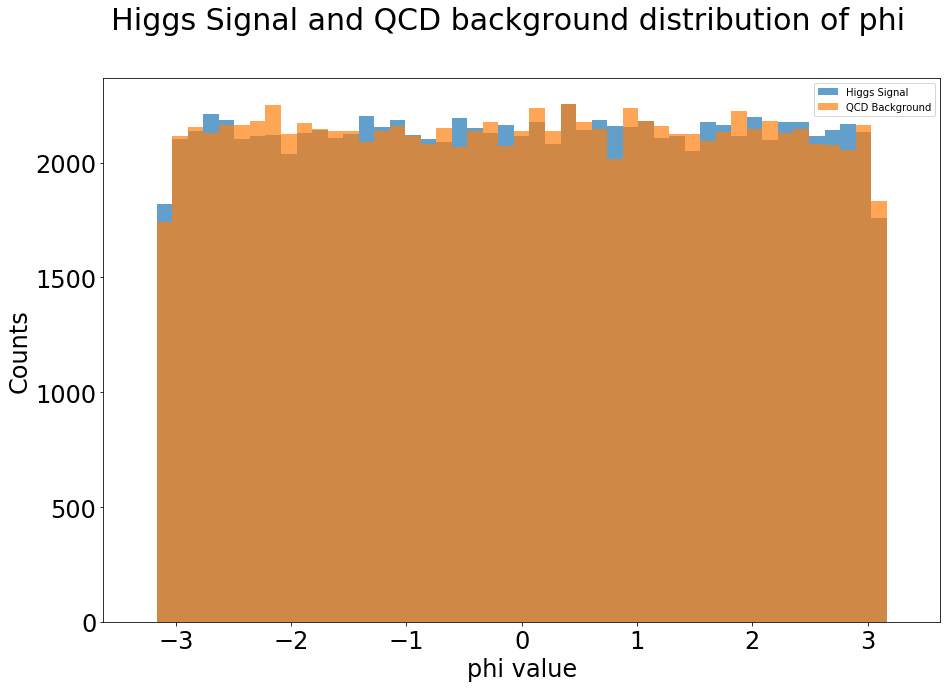

In [128]:
plt.suptitle('Higgs Signal and QCD background distribution of phi', fontsize=30)
plt.xlabel('phi value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

The Azimuthal angle for both signal and background jets appear to be evenly spread out.
<br>It is safe to say that the Azimuthal angles are just entirely random for any background of signal jet. 

In [85]:
print(np.max(data_higgs['mass']))
print(np.min(data_higgs['mass']))
print(np.max(data_qcd['mass']))
print(np.min(data_qcd['mass']))

142.43960717193664
8.971221491285528
321.39799320084865
9.292817333809852


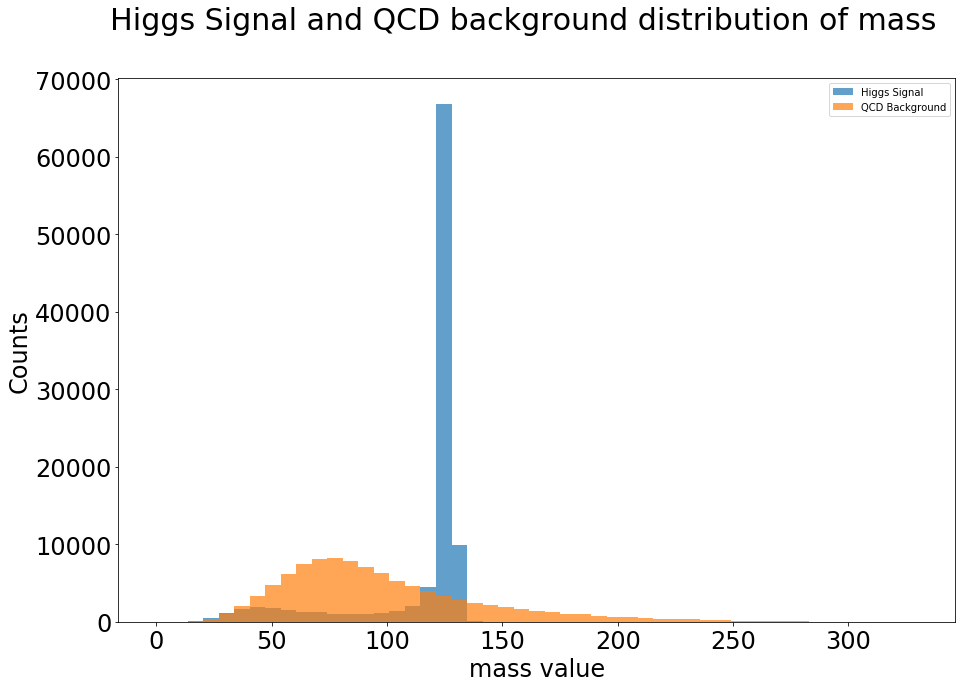

In [129]:
plt.suptitle('Higgs Signal and QCD background distribution of mass', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['mass'], bins = np.linspace(0,330,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['mass'], bins = np.linspace(0,330,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

Again, we see a very narrow distribution of signal mass.
<br>This makes sense because our signal comes from a single type of particle--Higgs, so we expect to see (almost) the same mass for all signal, but background contamination needs to be taken into account.

In [87]:
print(np.max(data_higgs['ee2']))
print(np.min(data_higgs['ee2']))
print(np.max(data_qcd['ee2']))
print(np.min(data_qcd['ee2']))

0.3187246305690015
0.006937985295836003
0.49594351112124496
0.0023917195413247693


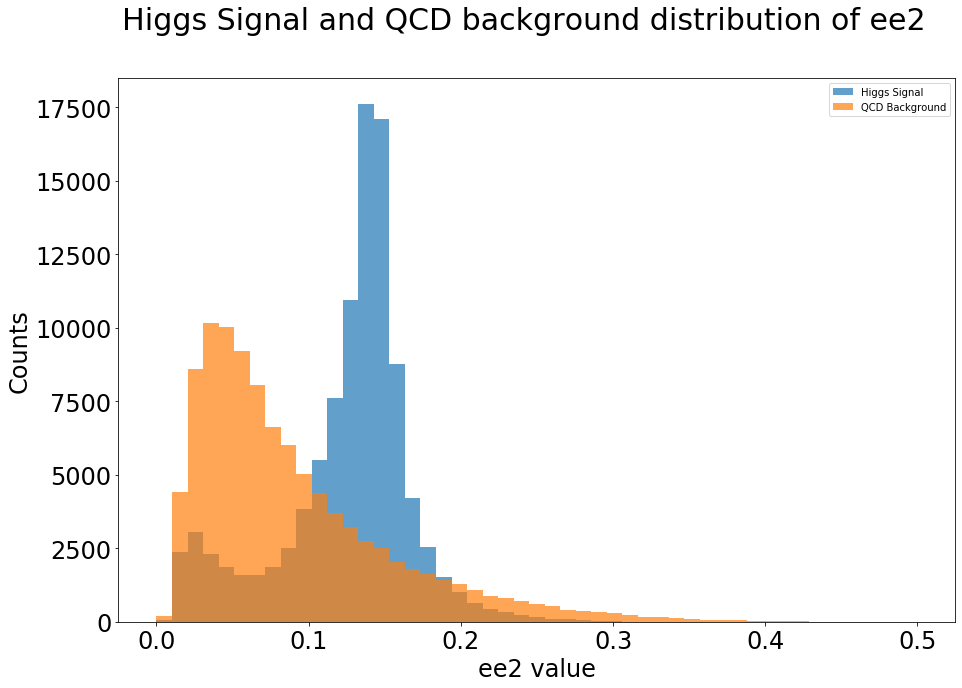

In [130]:
plt.suptitle('Higgs Signal and QCD background distribution of ee2', fontsize=30)
plt.xlabel('ee2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

The probability of finding a second jet within a specific distance is significantly larger for the signal. 
<br>This is to be expected if we're looking for Higgs decaying into two particles.

In [89]:
print(np.max(data_higgs['ee3']))
print(np.min(data_higgs['ee3']))
print(np.max(data_qcd['ee3']))
print(np.min(data_qcd['ee3']))

0.03004262938313143
2.0410128537758605e-06
0.11627387831954676
6.406593797149574e-07


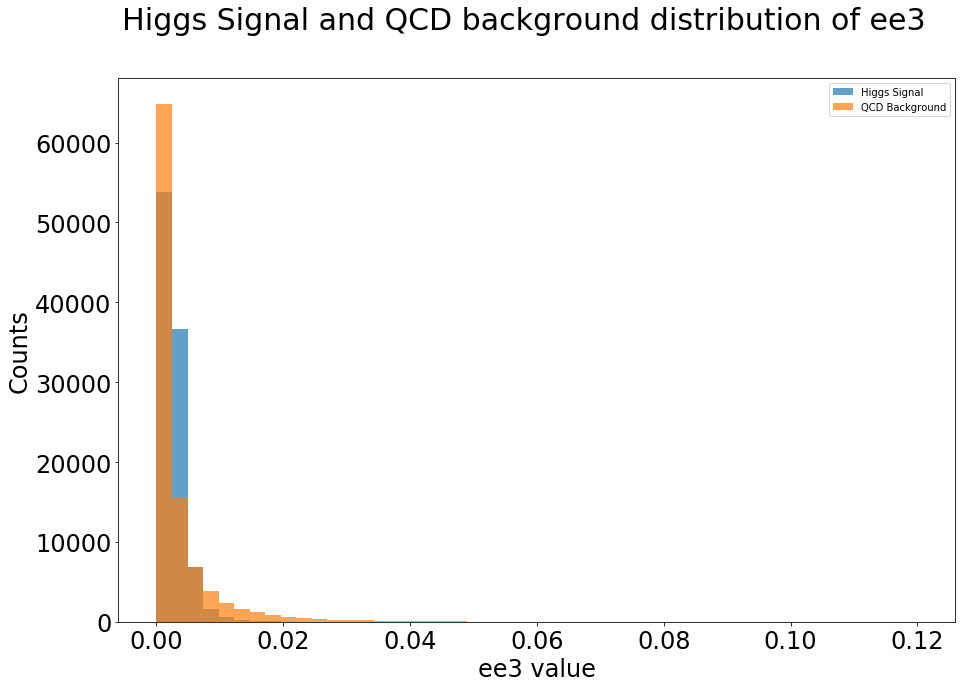

In [131]:
plt.suptitle('Higgs Signal and QCD background distribution of ee3', fontsize=30)
plt.xlabel('ee3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

The probability of finding a third jet within a specific distance is mostly zero for both signal and background.
<br>Since the signal isn't a decay producing 3 particles, it's near impossible to discover a third jet for the background or the signal.

In [96]:
print(np.max(data_higgs['d2']))
print(np.min(data_higgs['d2']))
print(np.max(data_qcd['d2']))
print(np.min(data_qcd['d2']))

33.722824368762204
0.27514340988789027
101.15656127003099
0.2813436928759825


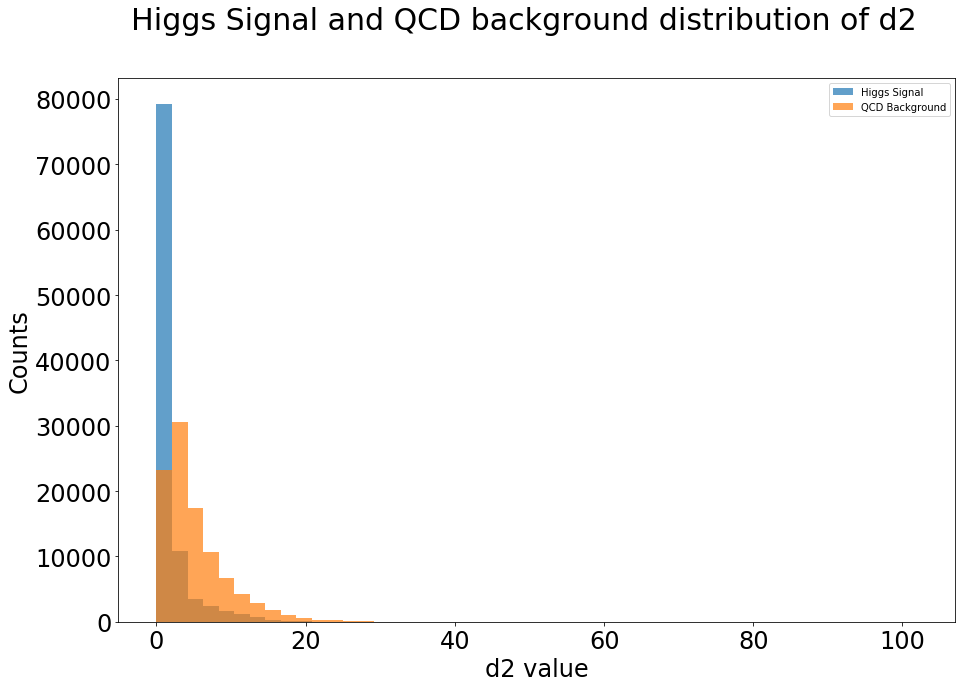

In [132]:
plt.suptitle('Higgs Signal and QCD background distribution of d2', fontsize=30)
plt.xlabel('d2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

d2 is ee3 divided by ee2 cubed.
<br>The divisor did not make d2 a much more discriminating feature than ee3.

In [99]:
print(np.max(data_higgs['angularity']))
print(np.min(data_higgs['angularity']))
print(np.max(data_qcd['angularity']))
print(np.min(data_qcd['angularity']))

0.06048162676069953
1.7552262297103823e-06
0.05360181614278
5.803207257858401e-07


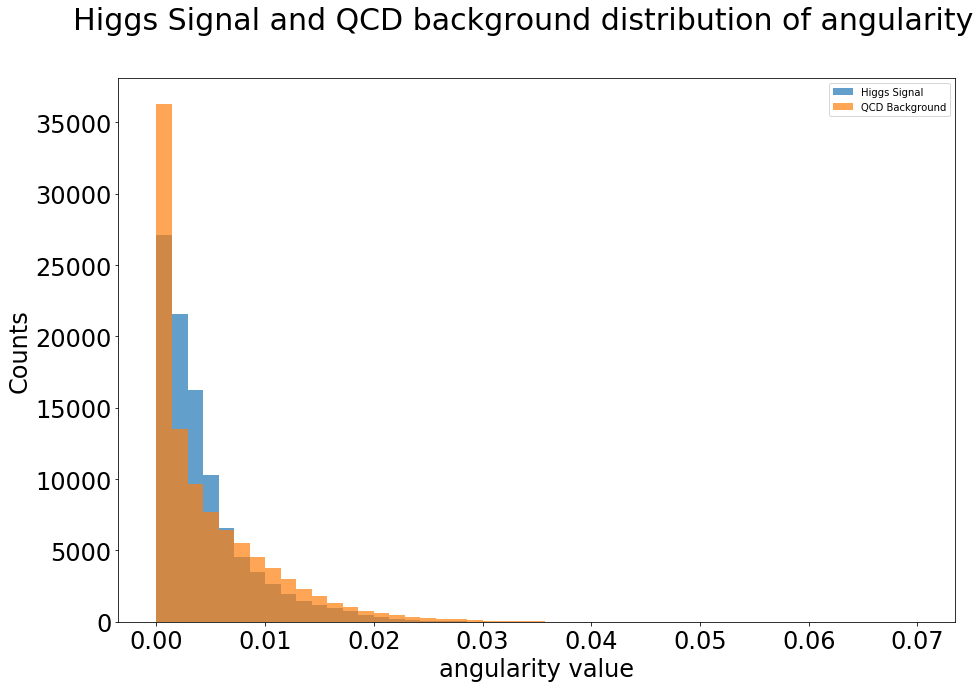

In [133]:
plt.suptitle('Higgs Signal and QCD background distribution of angularity', fontsize=30)
plt.xlabel('angularity value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

Angularity is low for both signal and background.
<br>With the Higgs decaying to a pair of particle-anti particle, we expect the signal decay to be highly symmetrical.
<br>But, it seems that most of the decays in the background aree also very symmetrical.

In [101]:
print(np.max(data_higgs['t1']))
print(np.min(data_higgs['t1']))
print(np.max(data_qcd['t1']))
print(np.min(data_qcd['t1']))

4.204353099247098
0.4918268863606649
3.9417208201681797
0.39261626205809913


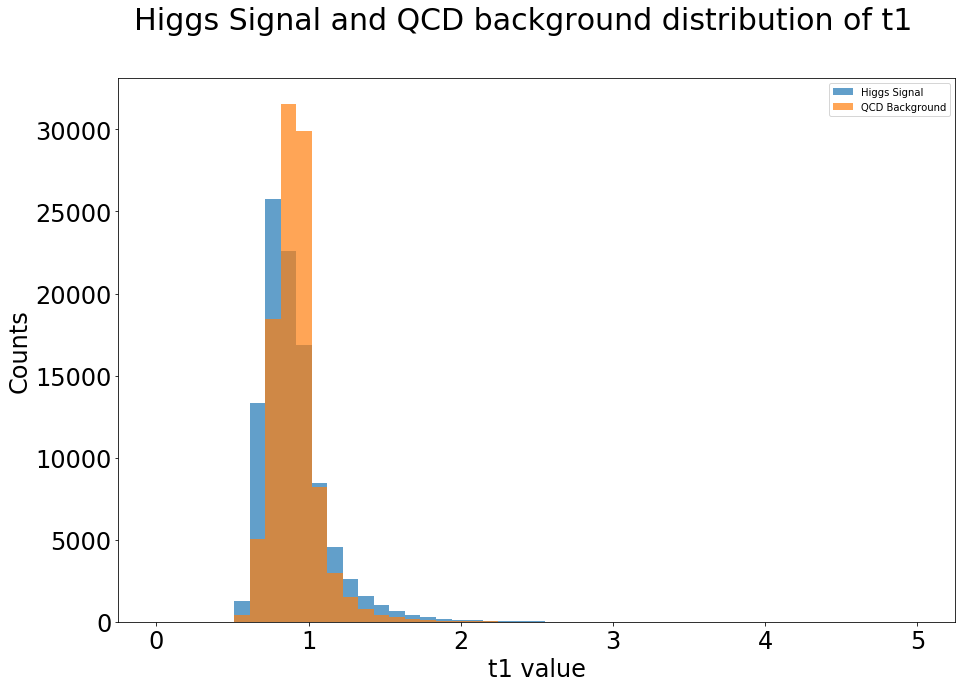

In [134]:
plt.suptitle('Higgs Signal and QCD background distribution of t1', fontsize=30)
plt.xlabel('t1 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

If we think each event as a single jet, it appears that we will not be able to tell signal from background easily.

In [112]:
print(np.max(data_higgs['t2']))
print(np.min(data_higgs['t2']))
print(np.max(data_qcd['t2']))
print(np.min(data_qcd['t2']))

2.446423676052458
0.051113719486245865
1.7802069782979835
0.04493185052832956


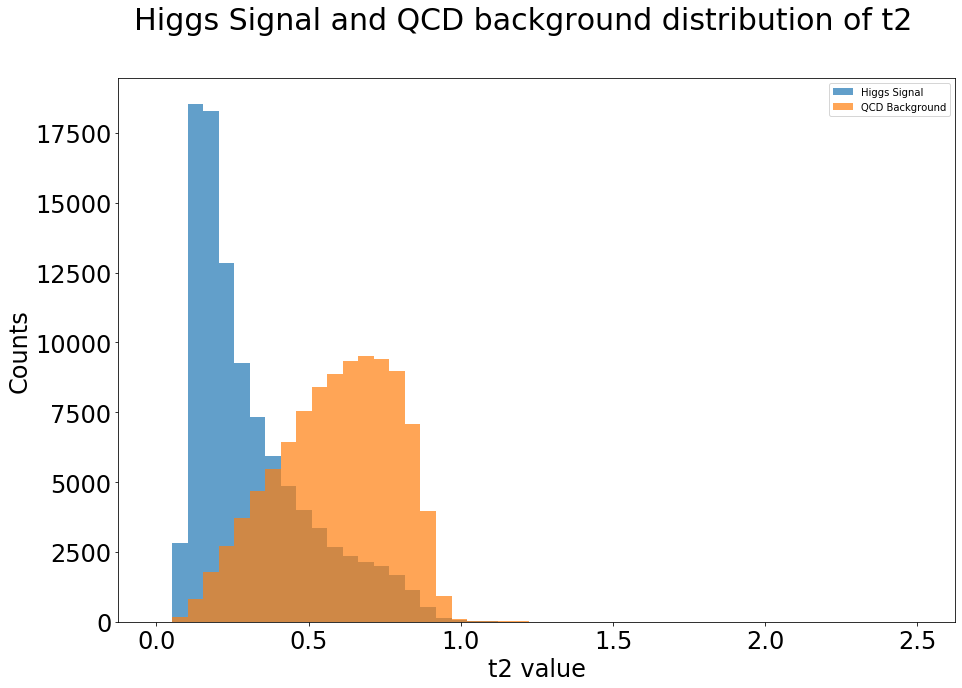

In [135]:
plt.suptitle('Higgs Signal and QCD background distribution of t2', fontsize=30)
plt.xlabel('t2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [114]:
print(np.max(data_higgs['t3']))
print(np.min(data_higgs['t3']))
print(np.max(data_qcd['t3']))
print(np.min(data_qcd['t3']))

1.0247762519174504
0.03888651795129442
1.111759027547582
0.02627531362847276


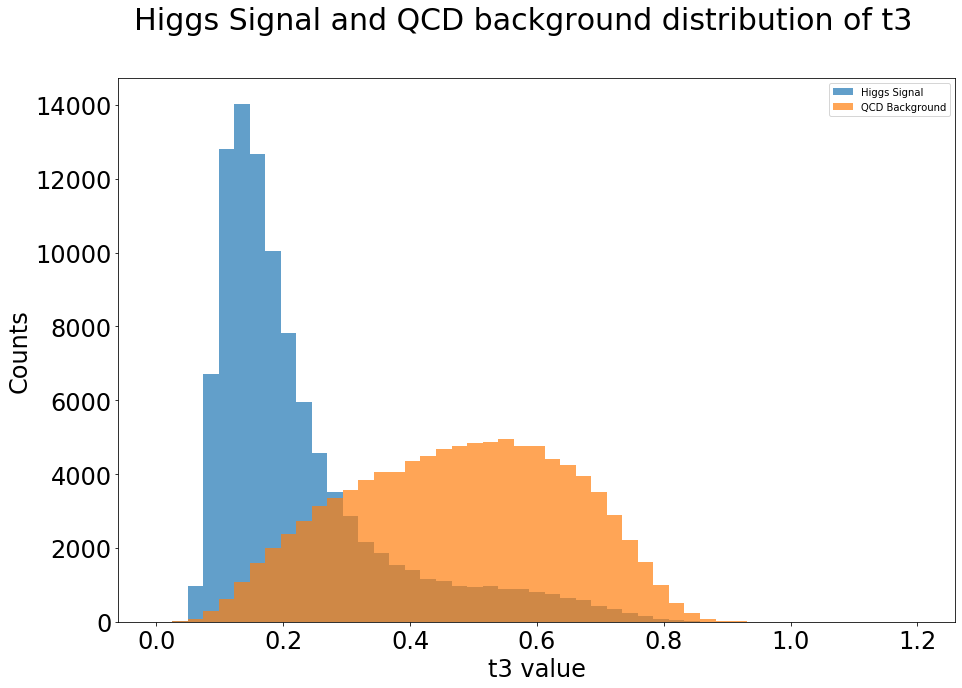

In [136]:
plt.suptitle('Higgs Signal and QCD background distribution of t3', fontsize=30)
plt.xlabel('t3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

If we see all events as two or three jets, the value for signal is very different from the background.
<br>However, n-subjettiness does not make the definitive say in whether the jet is in n jets, which is actually done by the ratios below.

In [117]:
print(np.max(data_higgs['t21']))
print(np.min(data_higgs['t21']))
print(np.max(data_qcd['t21']))
print(np.min(data_qcd['t21']))

0.9830459194576445
0.03415972715391194
0.9911035717628249
0.03554390992848359


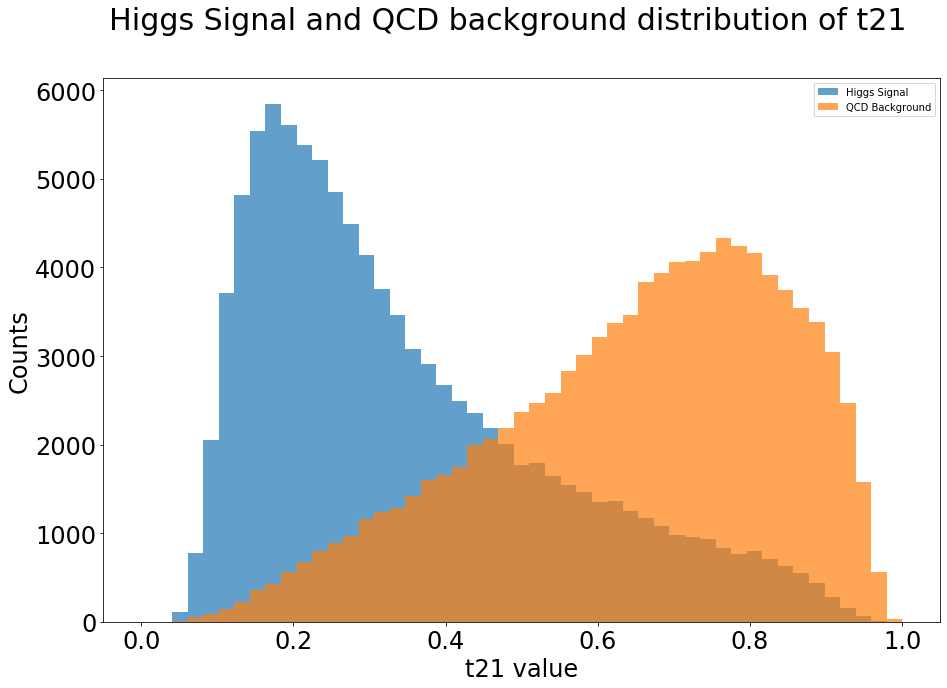

In [137]:
plt.suptitle('Higgs Signal and QCD background distribution of t21', fontsize=30)
plt.xlabel('t21 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

t2/t1 for signal is exceptionally small compared to the background.
<br>At such a small ratio, it's safe to say many of the signal end up emitting actually 2 sub jets.
<br>This is to be expected since we expected the Higgs to decay into two separate particles.

In [120]:
print(np.max(data_higgs['t32']))
print(np.min(data_higgs['t32']))
print(np.max(data_qcd['t32']))
print(np.min(data_qcd['t32']))

0.9817181910020212
0.09019468620813549
0.9882838724529619
0.07701525761578809


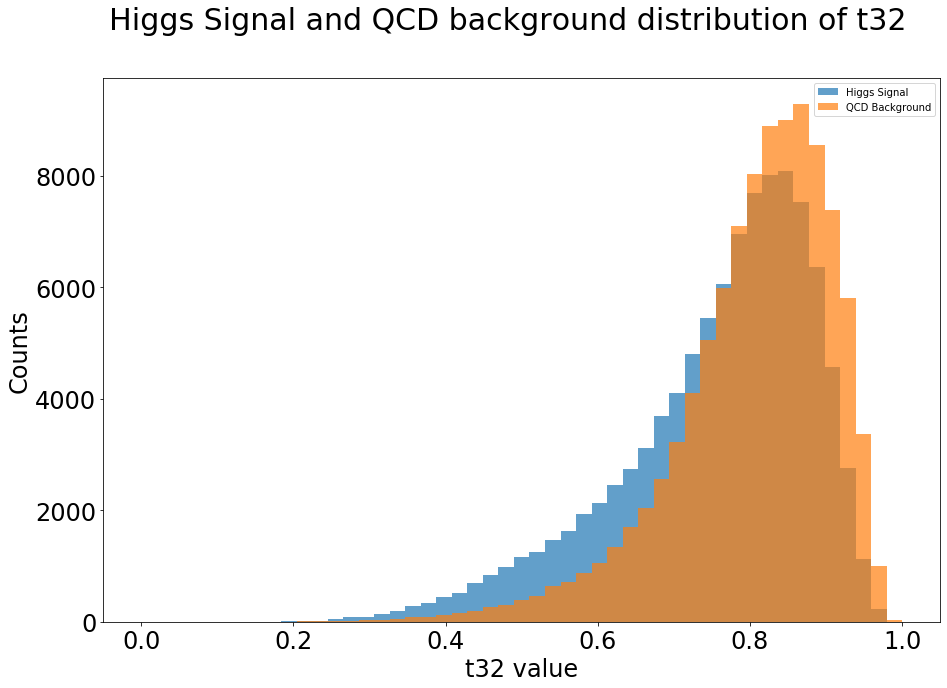

In [138]:
plt.suptitle('Higgs Signal and QCD background distribution of t32', fontsize=30)
plt.xlabel('t32 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

t3/t2 is not much different for signal or background.
<br>This shows us that neither the signal or the background is likely to decay into 3 sub jets.

In [123]:
print(np.max(data_higgs['KtDeltaR']))
print(np.min(data_higgs['KtDeltaR']))
print(np.max(data_qcd['KtDeltaR']))
print(np.min(data_qcd['KtDeltaR']))

1.0780744244640545
0.01102668608508021
1.2707496142700903
0.0049696206499564325


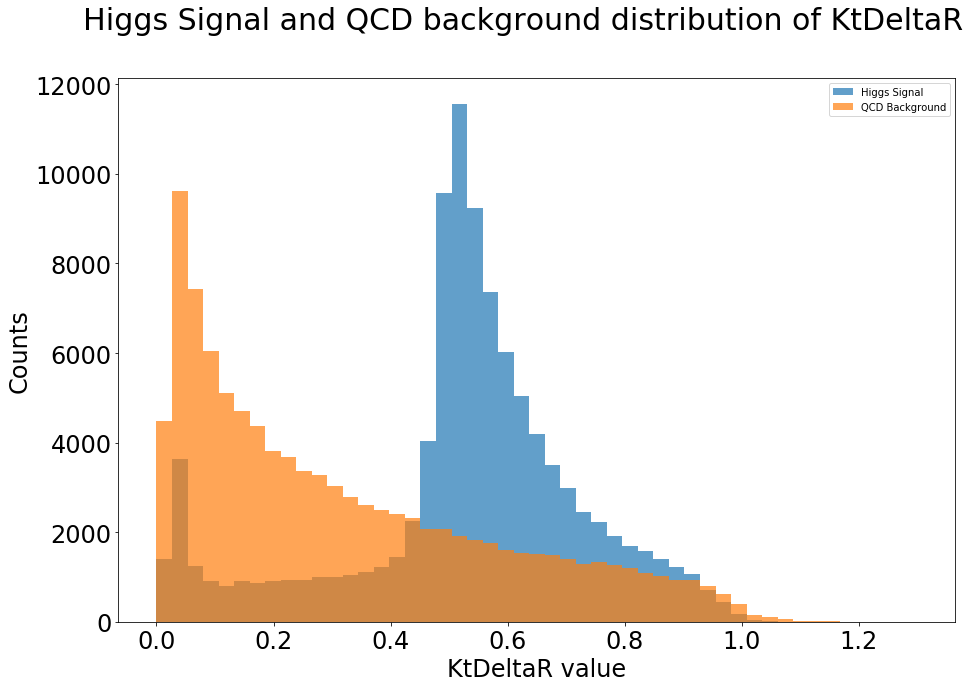

In [139]:
plt.suptitle('Higgs Signal and QCD background distribution of KtDeltaR', fontsize=30)
plt.xlabel('KtDeltaR value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

The distance between two sub jets for signal and background are quite different.
<br>While most of the background have small distances between two sub jets, the distance between two sub jets in the signals are larger.
<br>This would make sense if we consider most of the background forming single jets and the Higgs forming two jets.

From the histogram of all the features from the Higgs and QCD data, it appears that not all of the data have discrimination power.
<br>It appears that **pt, mass, ee2, t2, t3, t21 and KtDeltaR** for the two data have different means and thus have very different distributions,thus strong discriminating power.
<br>**eta, ee3, d2, angularity, t1 and t32** for the two data have very similar means and a similar shape in their distribution. Discriminating power for these features are poor.
<br>The **phi** histogram for signal and background are not discernible at all. No discriminating power.

# 2.

We know from the definition of the terms, that t21 and t32 are related to t2,t1 and t3,t2 respectively. Similarly for d2 with ee2 and ee3.

For all other terms, I've plotted scatterplots against each remaining pair of the 14 features, and these are the ones that appeared to have some kind of correlation.
For each pair that have some kind of correlation, the first 1000 entries and every 100th entry produce similar plots so it's safe to say both plots may represent the correlation between data.

Since we want to see the correlation between data, it's best to check on the QCD background, which has no signals.

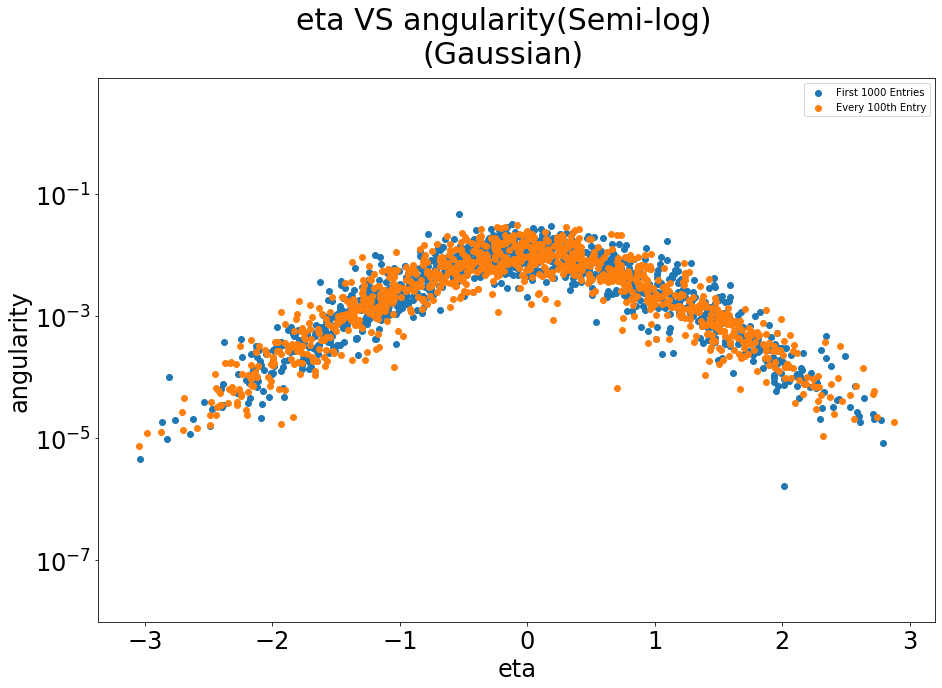

In [25]:
plt.suptitle('eta VS angularity(Semi-log)\n(Gaussian)', fontsize=30)
plt.xlabel('eta', fontsize = 24)
plt.ylabel('angularity', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.scatter(data_qcd['eta'][0:1000], data_qcd['angularity'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['eta'][0::100], data_qcd['angularity'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

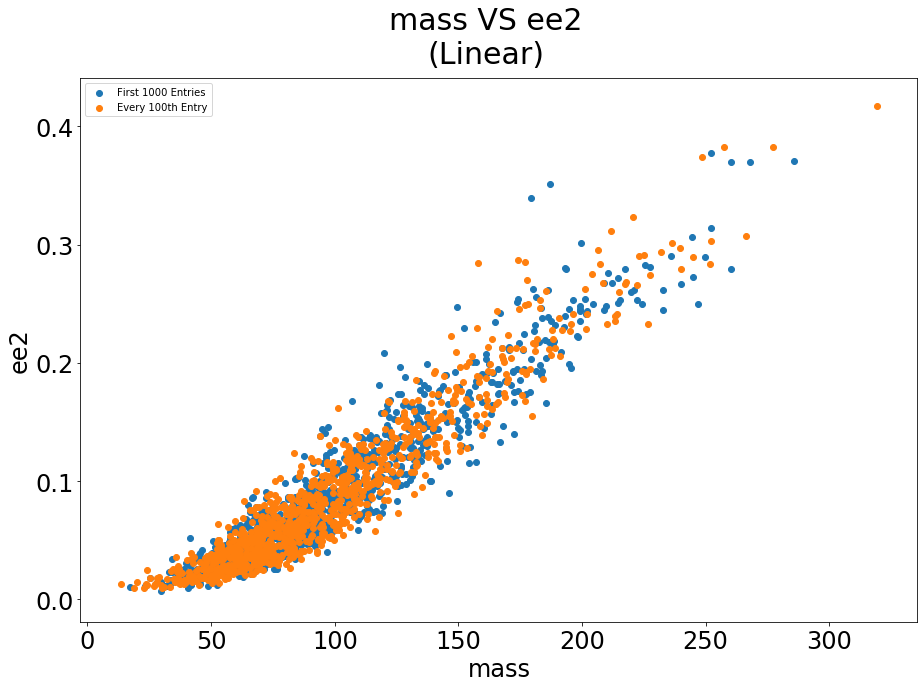

In [61]:
plt.suptitle('mass VS ee2\n(Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('ee2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['ee2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['ee2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

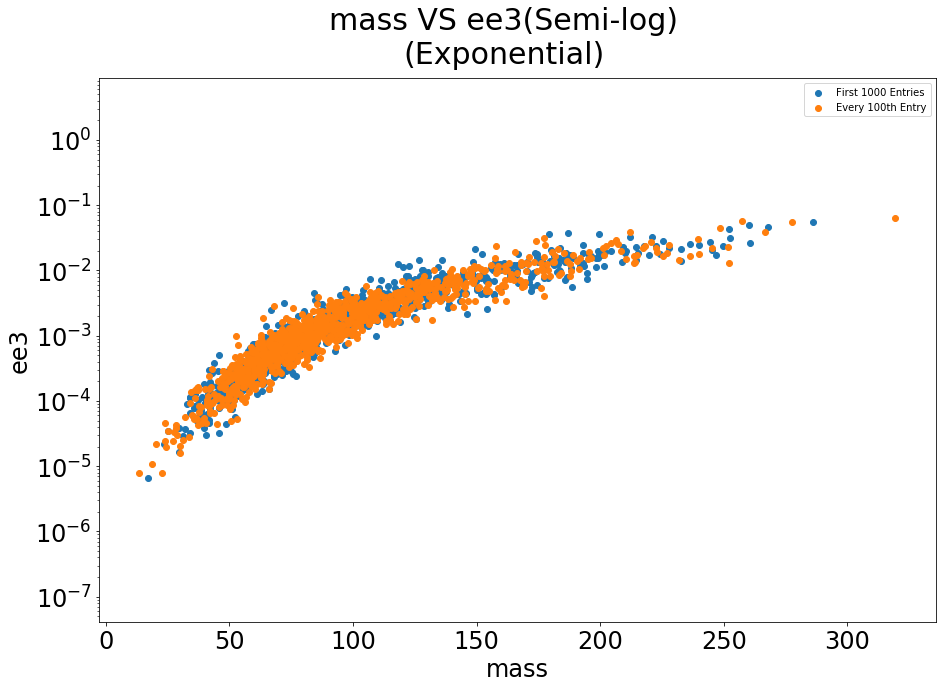

In [24]:
plt.suptitle('mass VS ee3(Semi-log)\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('ee3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.scatter(data_qcd['mass'][0:1000], data_qcd['ee3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['ee3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

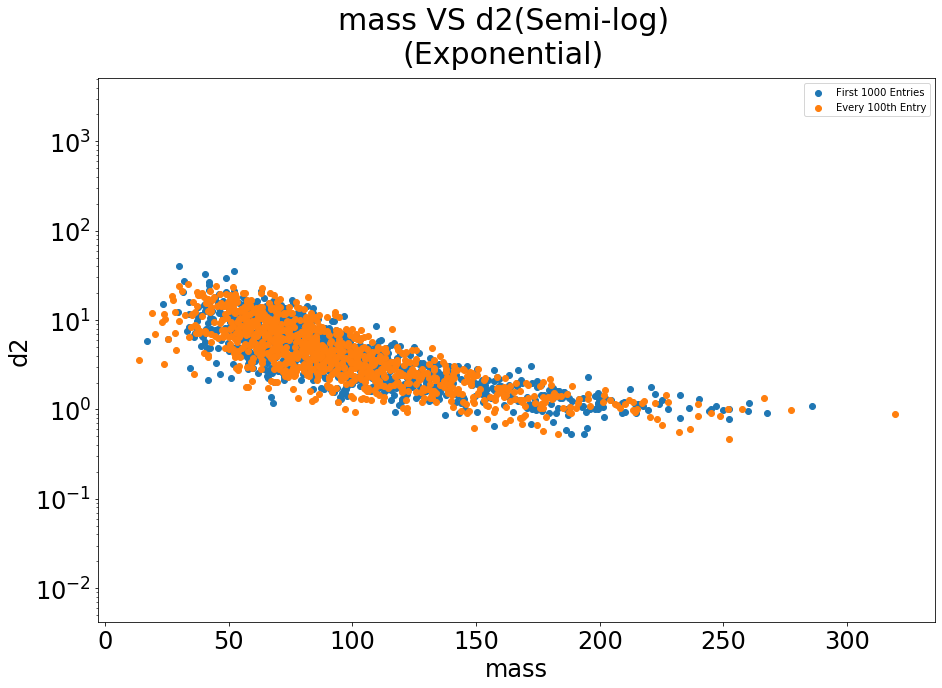

In [23]:
plt.suptitle('mass VS d2(Semi-log)\n(Exponential)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('d2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.scatter(data_qcd['mass'][0:1000], data_qcd['d2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['d2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

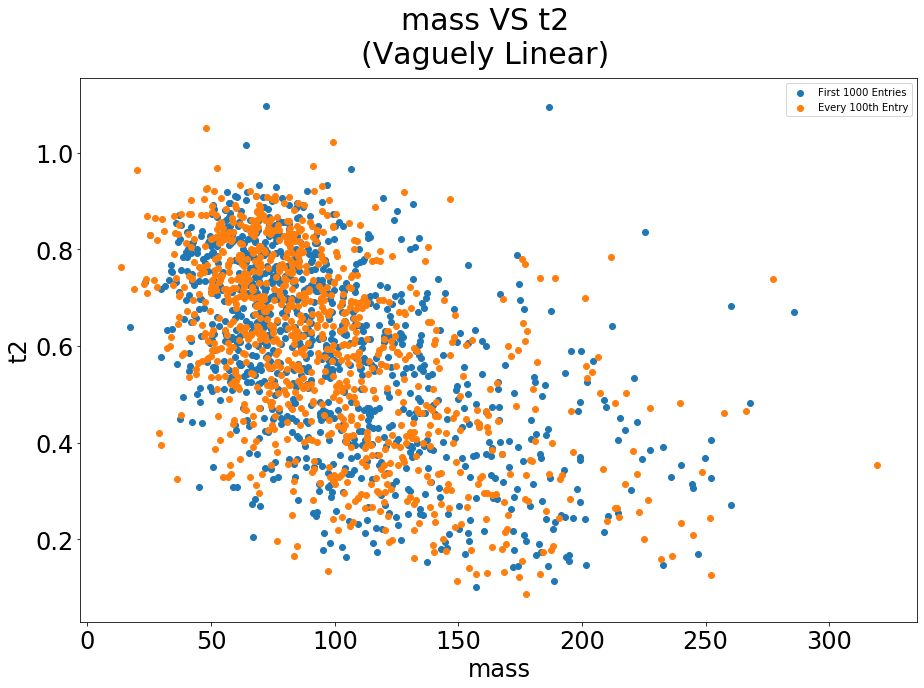

In [99]:
plt.suptitle('mass VS t2\n(Vaguely Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

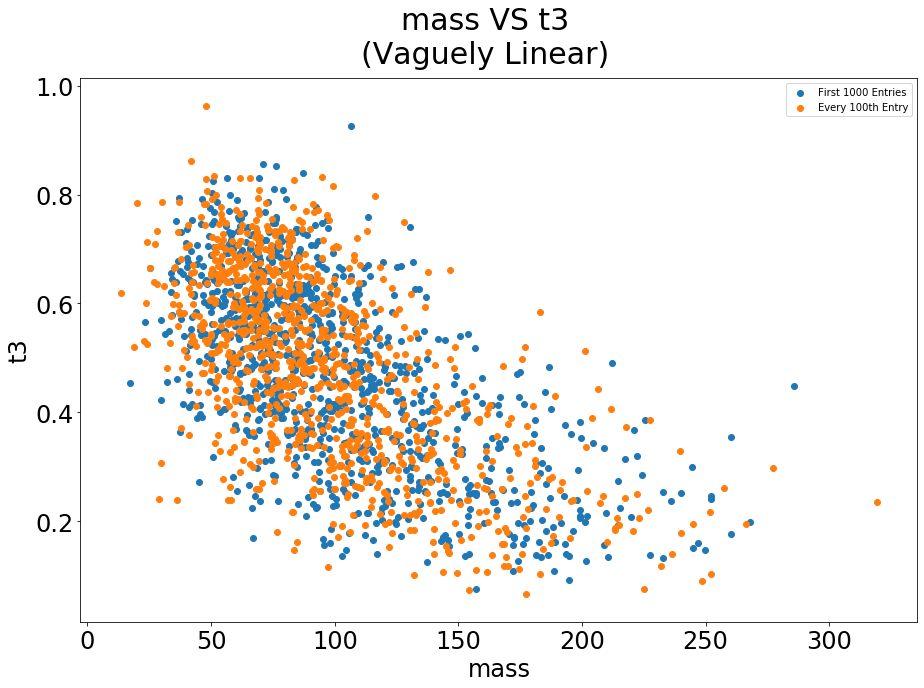

In [11]:
plt.suptitle('mass VS t3\n(Vaguely Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

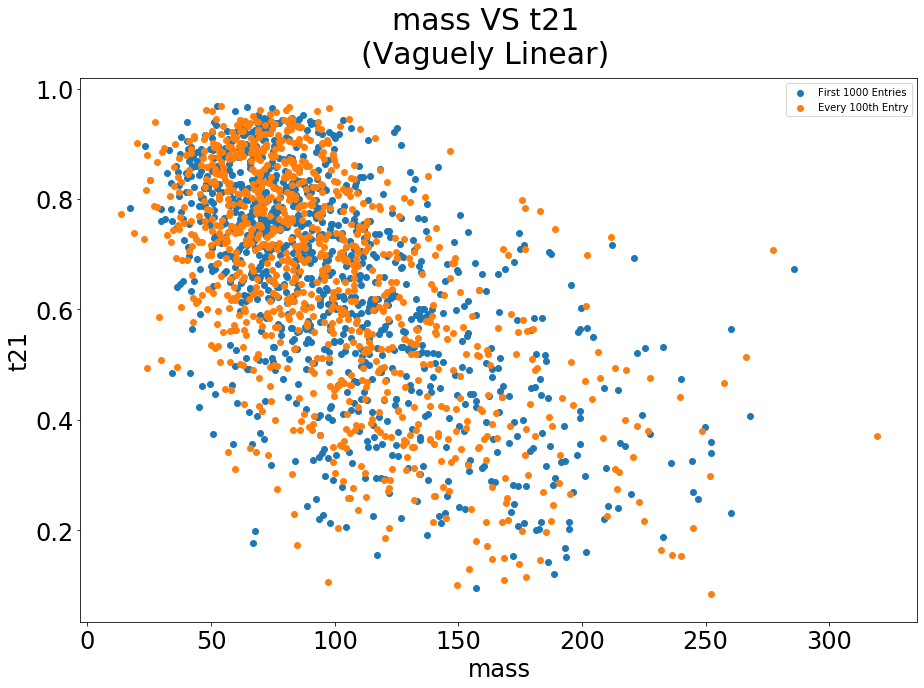

In [12]:
plt.suptitle('mass VS t21\n(Vaguely Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t21', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t21'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t21'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

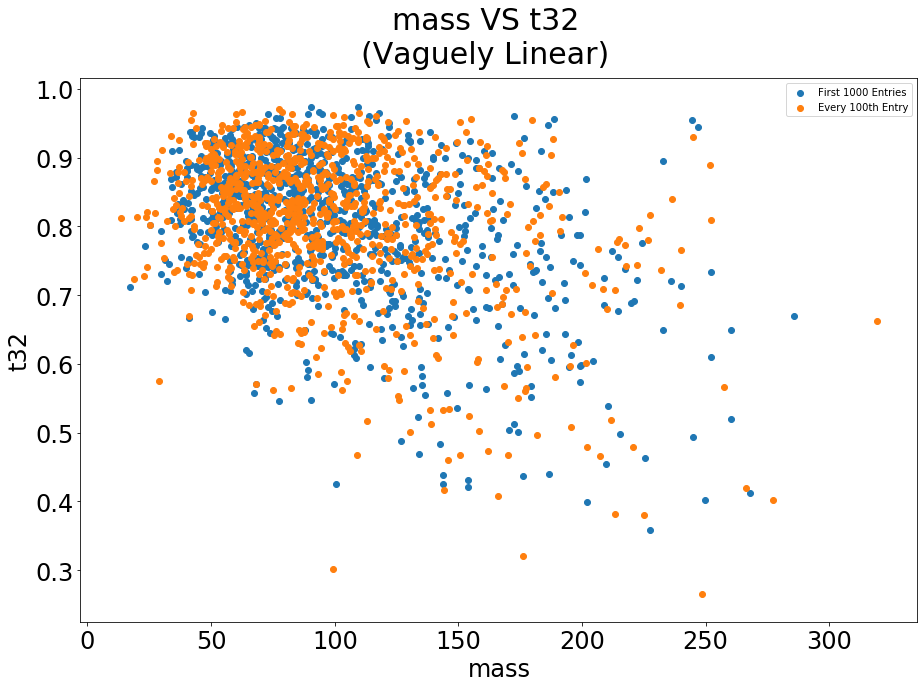

In [25]:
plt.suptitle('mass VS t32\n(Vaguely Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('t32', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['t32'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['t32'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

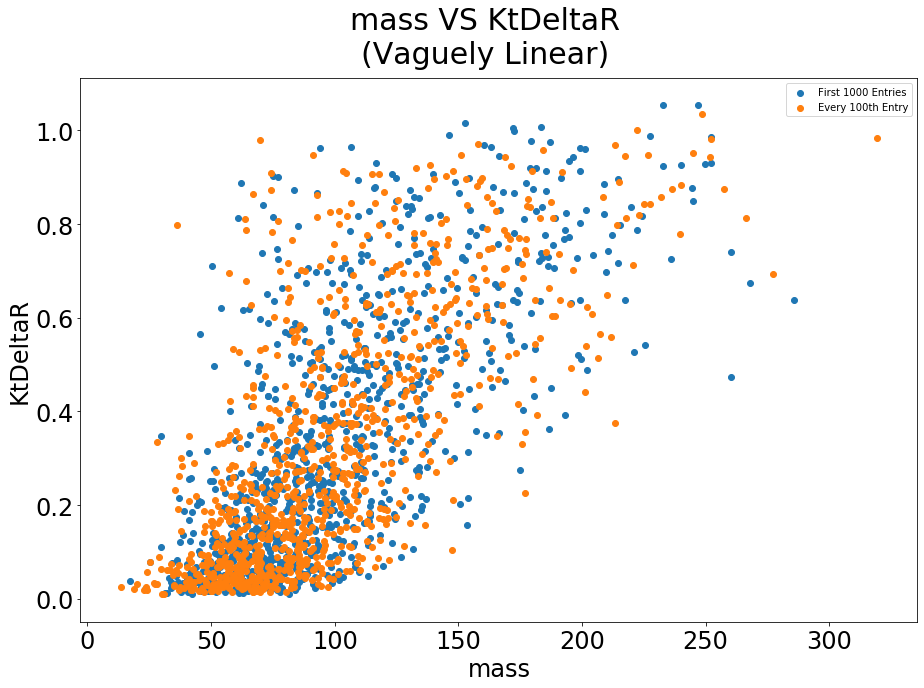

In [26]:
plt.suptitle('mass VS KtDeltaR\n(Vaguely Linear)', fontsize=30)
plt.xlabel('mass', fontsize = 24)
plt.ylabel('KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['mass'][0:1000], data_qcd['KtDeltaR'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['mass'][0::100], data_qcd['KtDeltaR'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

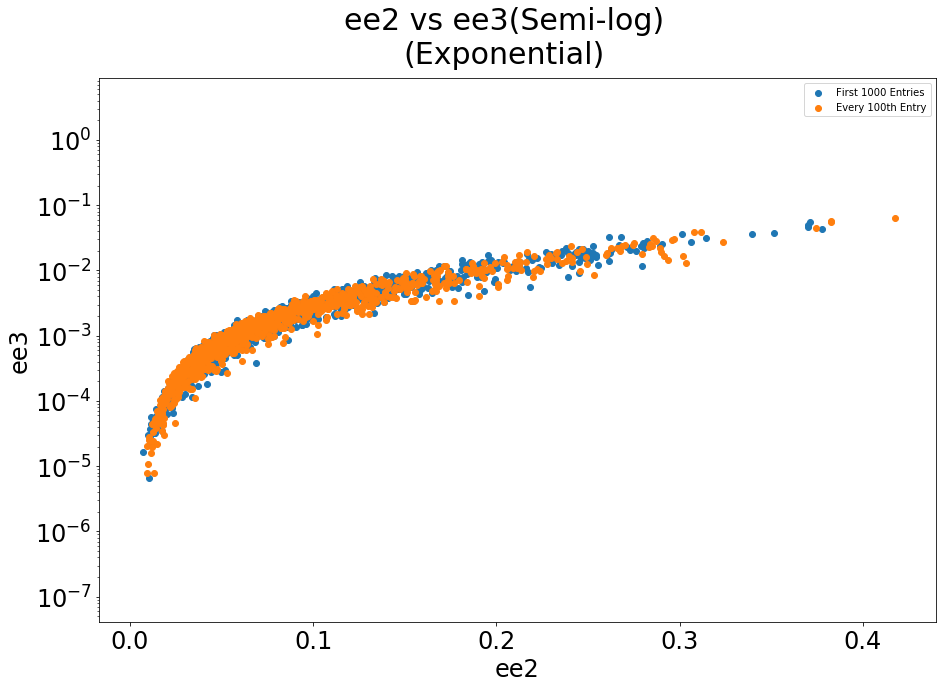

In [22]:
plt.suptitle('ee2 vs ee3(Semi-log)\n(Exponential)', fontsize=30)
plt.xlabel('ee2', fontsize = 24)
plt.ylabel('ee3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['ee3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['ee2'][0::100], data_qcd['ee3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

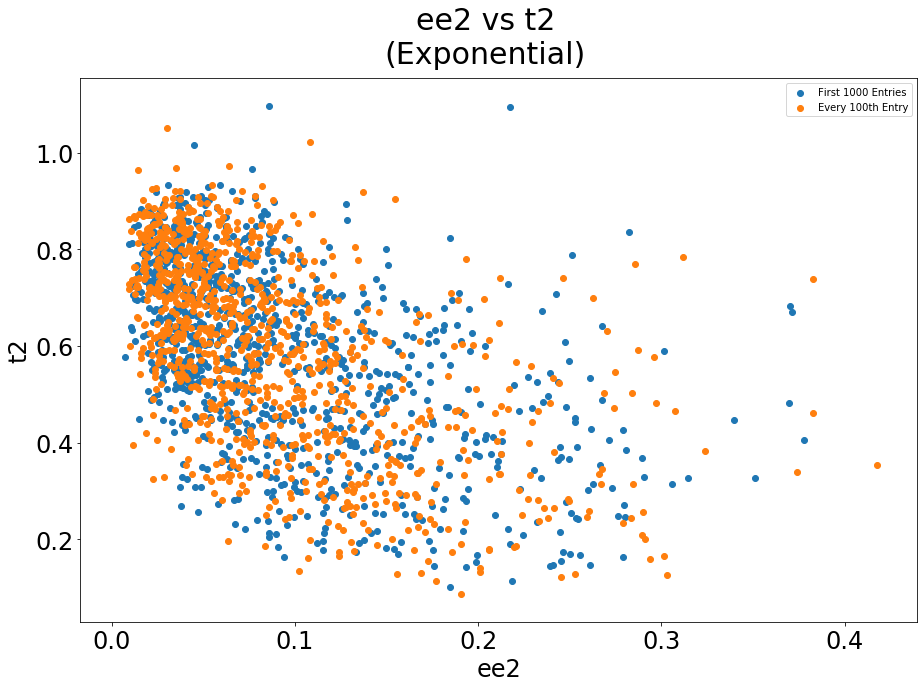

In [94]:
plt.suptitle('ee2 vs t2\n(Exponential)', fontsize=30)
plt.xlabel('ee2', fontsize = 24)
plt.ylabel('t2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

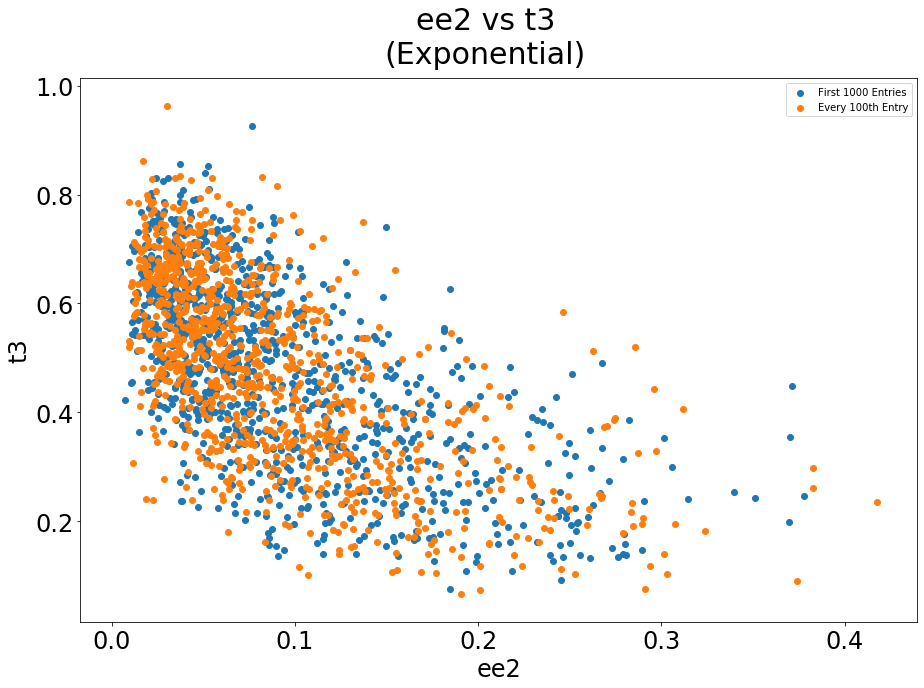

In [93]:
plt.suptitle('ee2 vs t3\n(Exponential)', fontsize=30)
plt.xlabel('ee2', fontsize = 24)
plt.ylabel('t3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

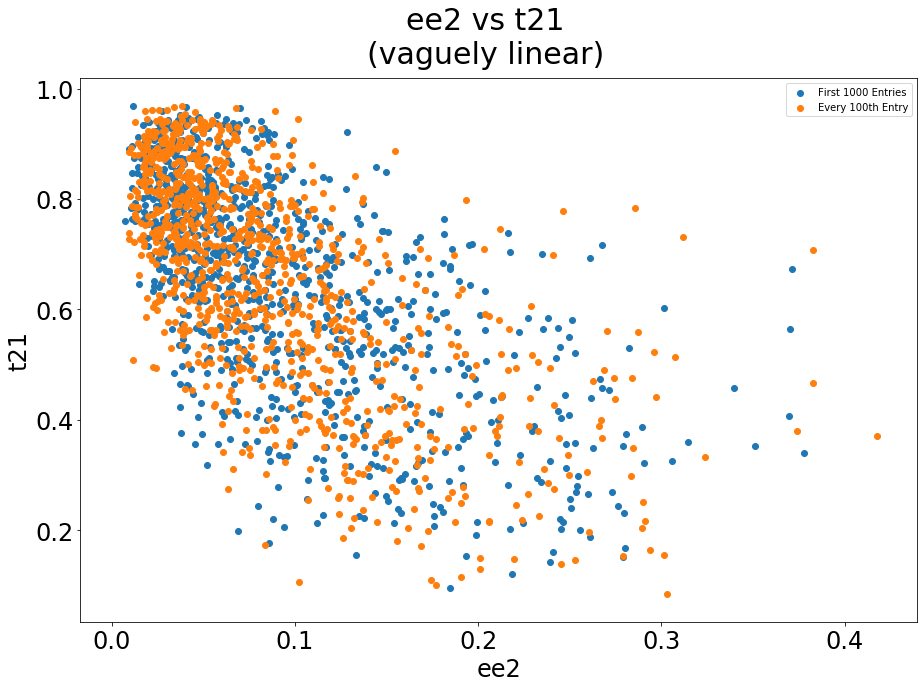

In [31]:
plt.suptitle('ee2 vs t21\n(vaguely linear)', fontsize=30)
plt.xlabel('ee2', fontsize = 24)
plt.ylabel('t21', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t21'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t21'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

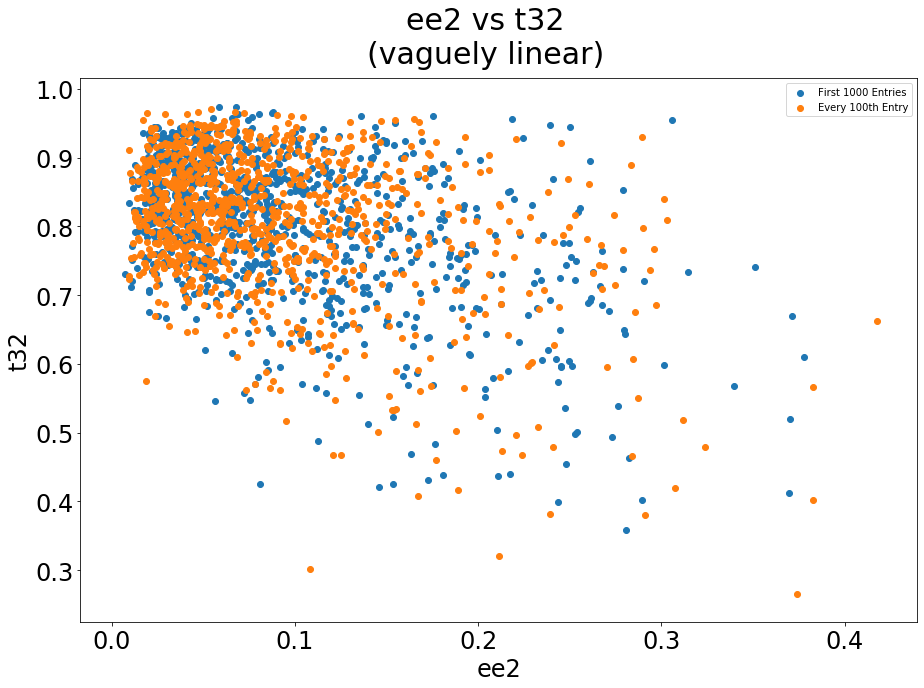

In [32]:
plt.suptitle('ee2 vs t32\n(vaguely linear)', fontsize=30)
plt.xlabel('ee2', fontsize = 24)
plt.ylabel('t32', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['t32'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['ee2'][0::100], data_qcd['t32'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

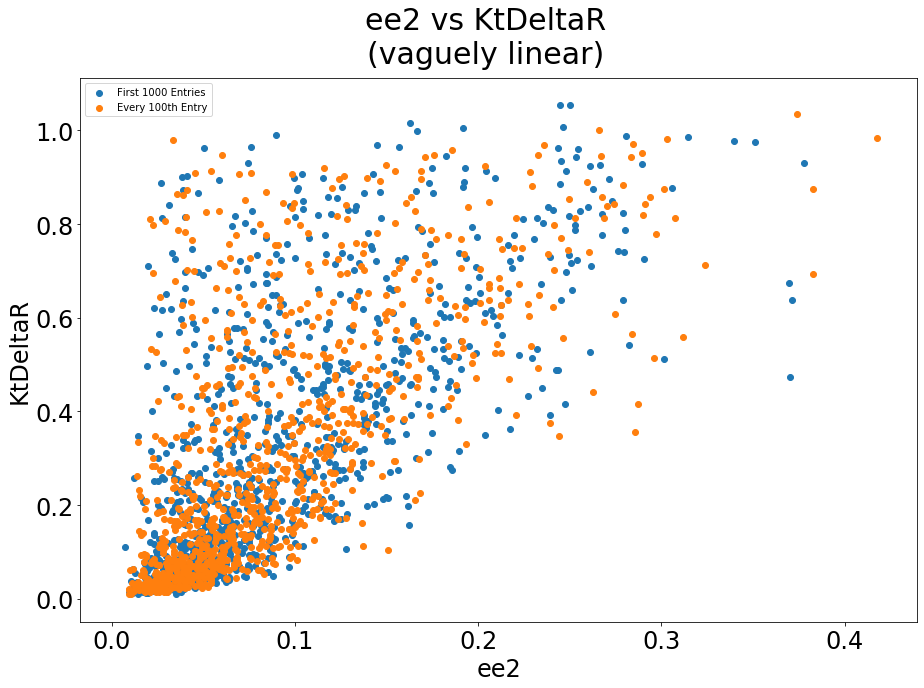

In [33]:
plt.suptitle('ee2 vs KtDeltaR\n(vaguely linear)', fontsize=30)
plt.xlabel('ee2', fontsize = 24)
plt.ylabel('KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['ee2'][0:1000], data_qcd['KtDeltaR'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['ee2'][0::100], data_qcd['KtDeltaR'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

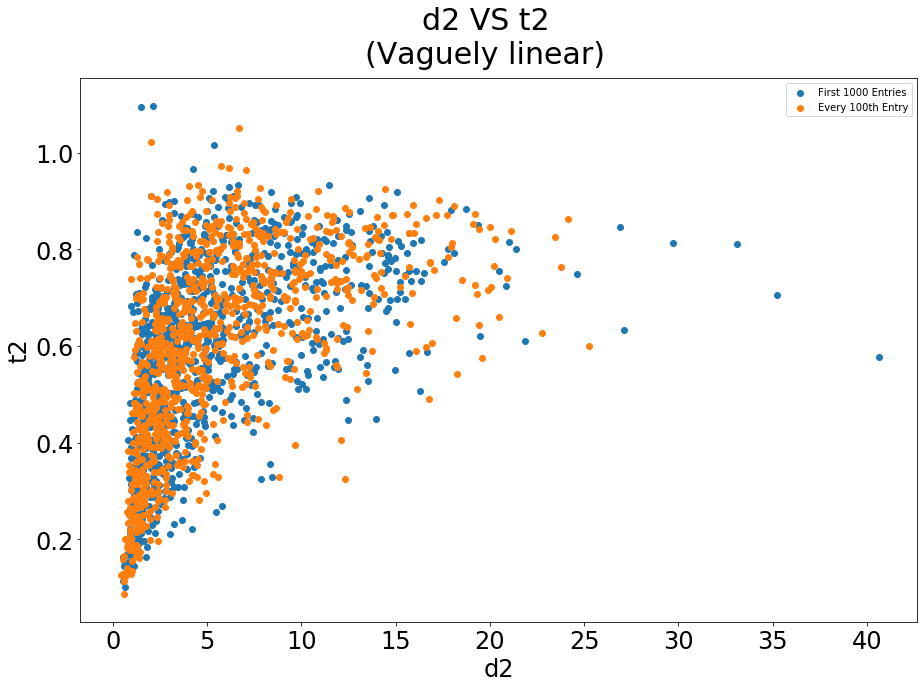

In [72]:
plt.suptitle('d2 VS t2\n(Vaguely linear)', fontsize=30)
plt.xlabel('d2', fontsize = 24)
plt.ylabel('t2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['d2'][0::100], data_qcd['t2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

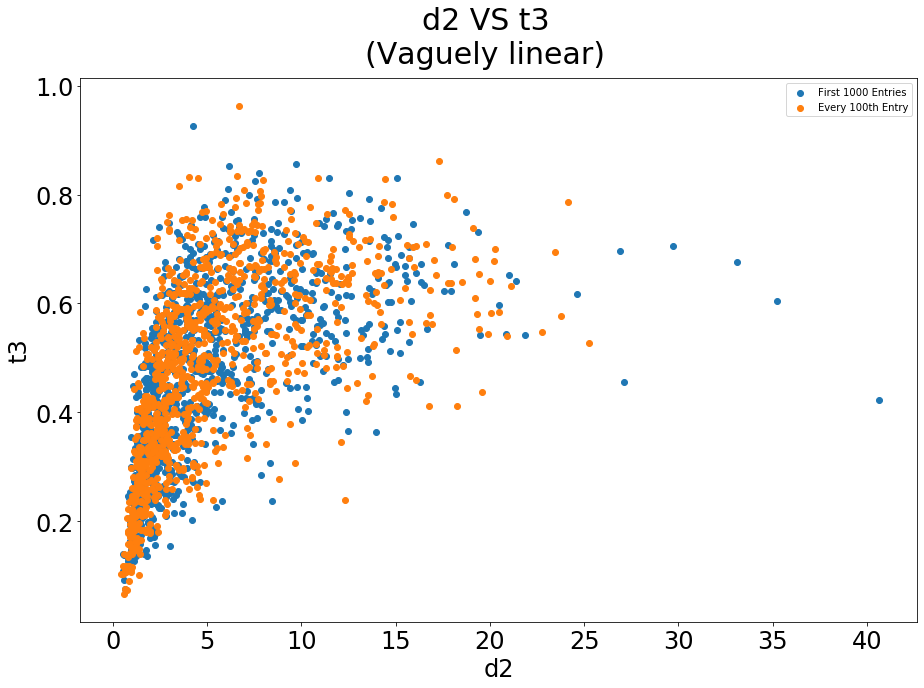

In [73]:
plt.suptitle('d2 VS t3\n(Vaguely linear)', fontsize=30)
plt.xlabel('d2', fontsize = 24)
plt.ylabel('t3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['d2'][0::100], data_qcd['t3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

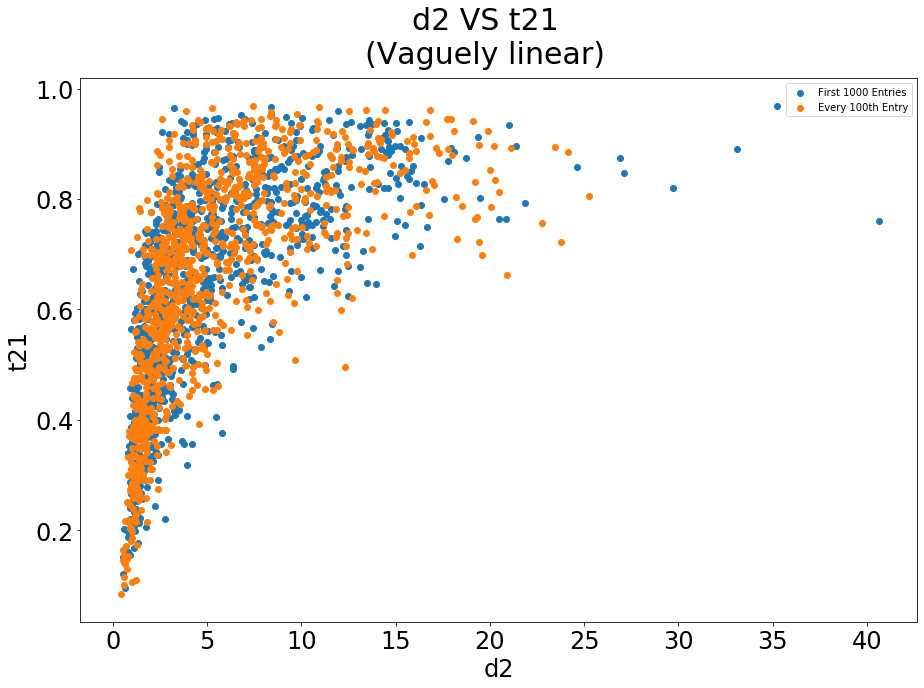

In [74]:
plt.suptitle('d2 VS t21\n(Vaguely linear)', fontsize=30)
plt.xlabel('d2', fontsize = 24)
plt.ylabel('t21', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['d2'][0:1000], data_qcd['t21'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['d2'][0::100], data_qcd['t21'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

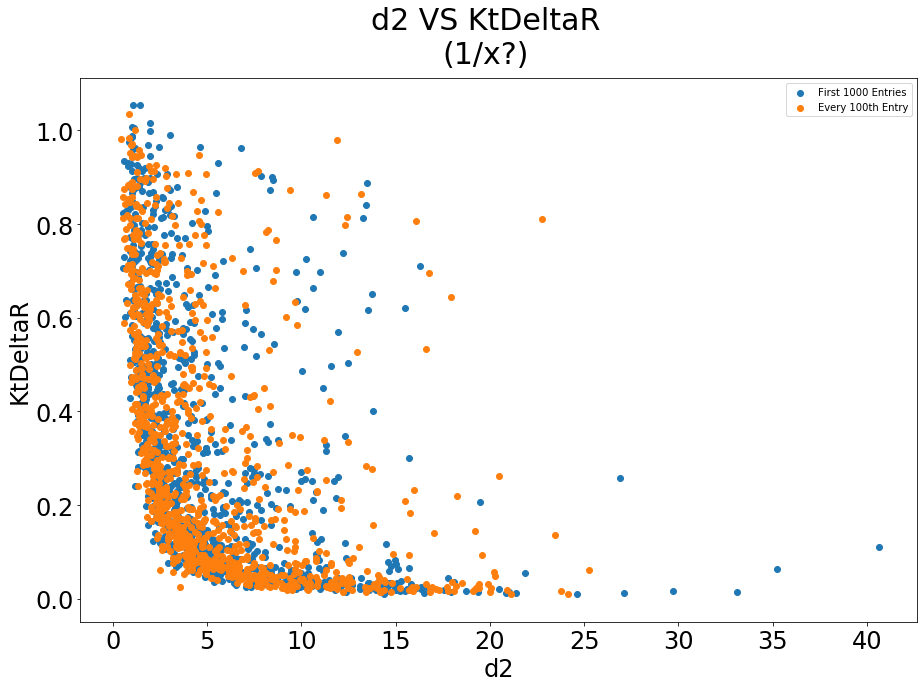

In [79]:
plt.suptitle('d2 VS KtDeltaR\n(1/x?)', fontsize=30)
plt.xlabel('d2', fontsize = 24)
plt.ylabel('KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['d2'][0:1000], data_qcd['KtDeltaR'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['d2'][0::100], data_qcd['KtDeltaR'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

To see if it's truly 1/x:

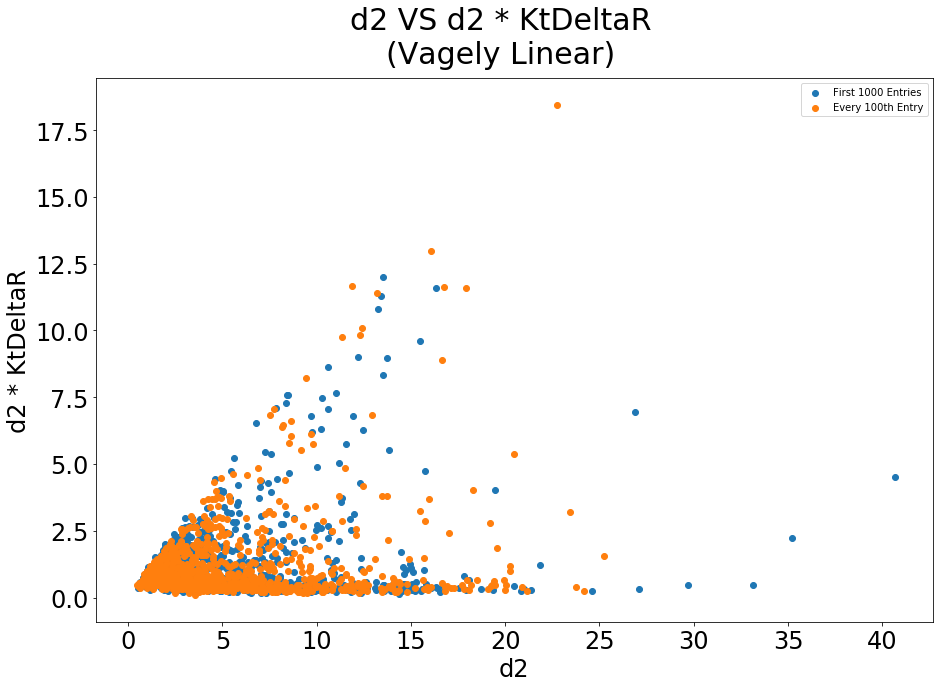

In [21]:
plt.suptitle('d2 VS d2 * KtDeltaR\n(Vagely Linear)', fontsize=30)
plt.xlabel('d2', fontsize = 24)
plt.ylabel('d2 * KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['d2'][0:1000], np.multiply(data_qcd['d2'][0:1000], data_qcd['KtDeltaR'][0:1000]), label = "First 1000 Entries")
plt.scatter(data_qcd['d2'][0::100], np.multiply(data_qcd['d2'][0::100], data_qcd['KtDeltaR'][0::100]), label = "Every 100th Entry") 
plt.legend()
plt.show()

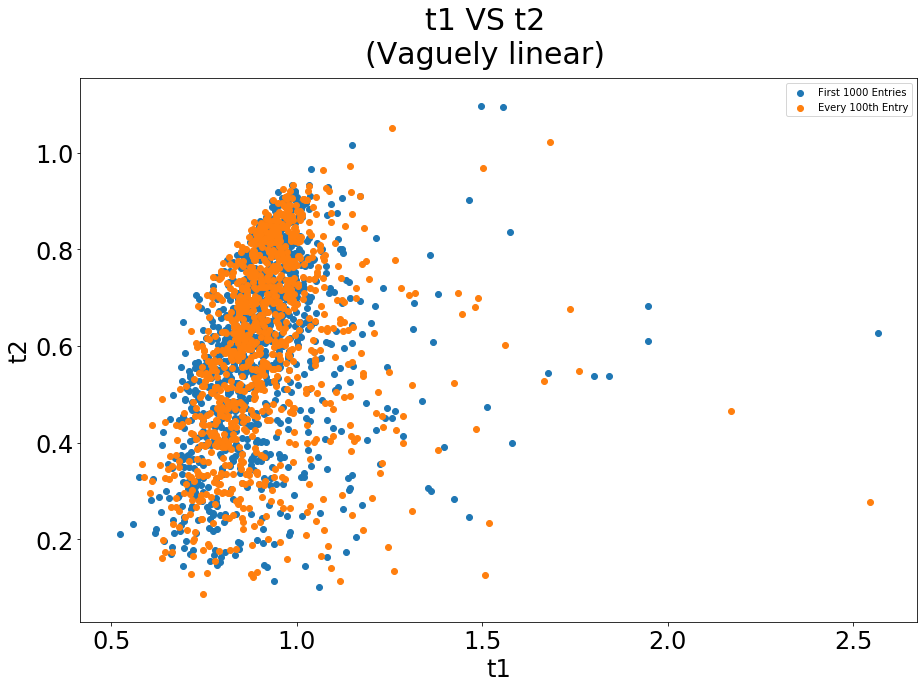

In [50]:
plt.suptitle('t1 VS t2\n(Vaguely linear)', fontsize=30)
plt.xlabel('t1', fontsize = 24)
plt.ylabel('t2', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t1'][0:1000], data_qcd['t2'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t1'][0::100], data_qcd['t2'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

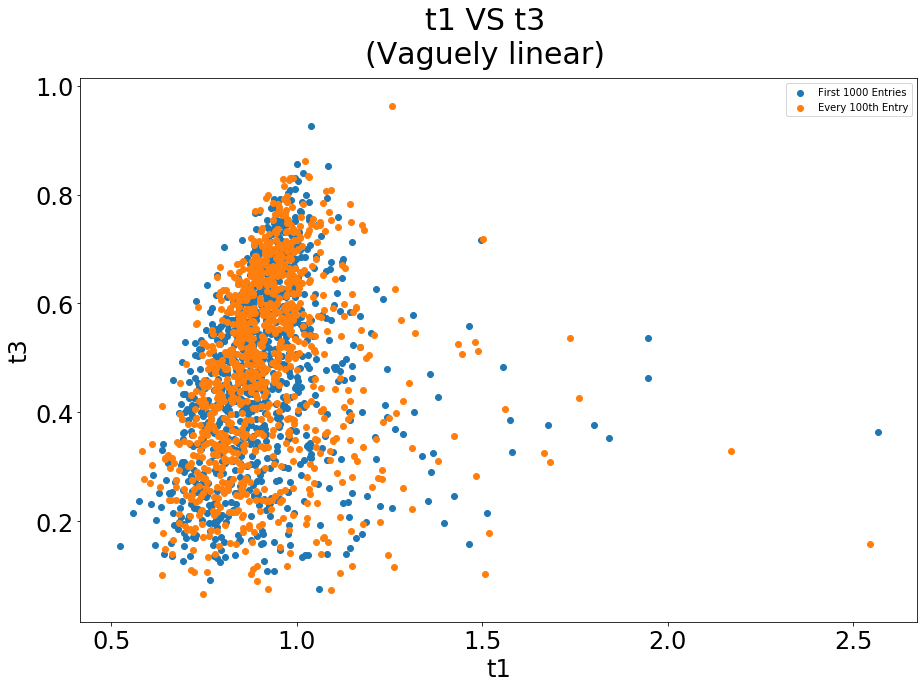

In [51]:
plt.suptitle('t1 VS t3\n(Vaguely linear)', fontsize=30)
plt.xlabel('t1', fontsize = 24)
plt.ylabel('t3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t1'][0:1000], data_qcd['t3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t1'][0::100], data_qcd['t3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

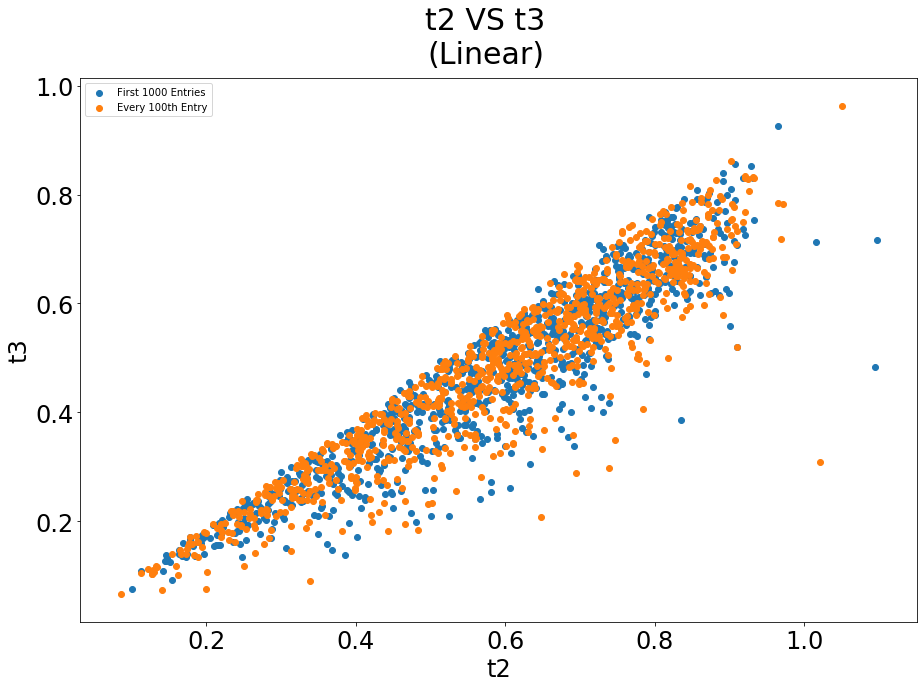

In [53]:
plt.suptitle('t2 VS t3\n(Linear)', fontsize=30)
plt.xlabel('t2', fontsize = 24)
plt.ylabel('t3', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t2'][0:1000], data_qcd['t3'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t2'][0::100], data_qcd['t3'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

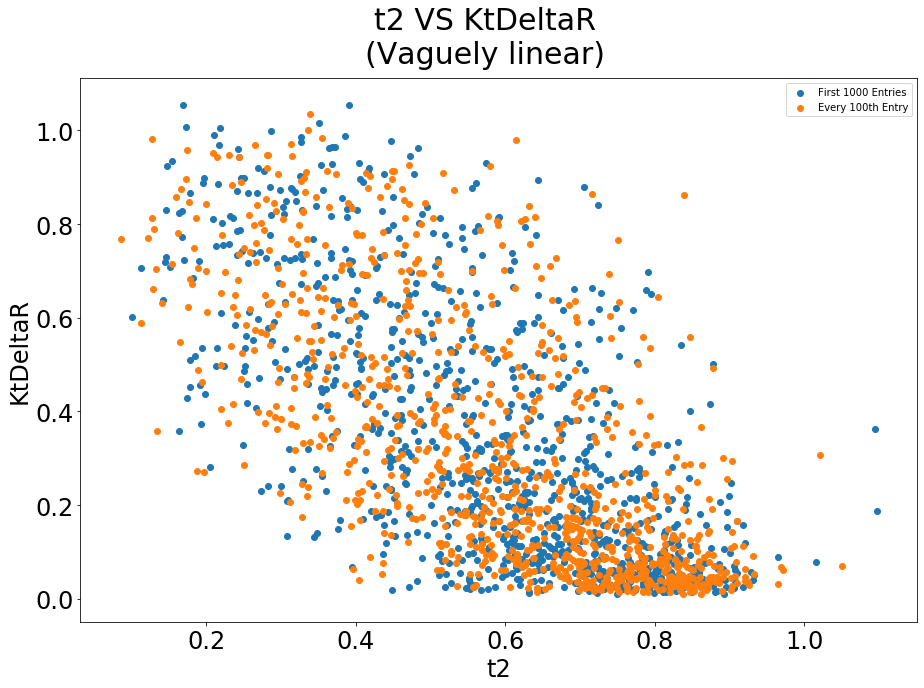

In [100]:
plt.suptitle('t2 VS KtDeltaR\n(Vaguely linear)', fontsize=30)
plt.xlabel('t2', fontsize = 24)
plt.ylabel('KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t2'][0:1000], data_qcd['KtDeltaR'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t2'][0::100], data_qcd['KtDeltaR'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

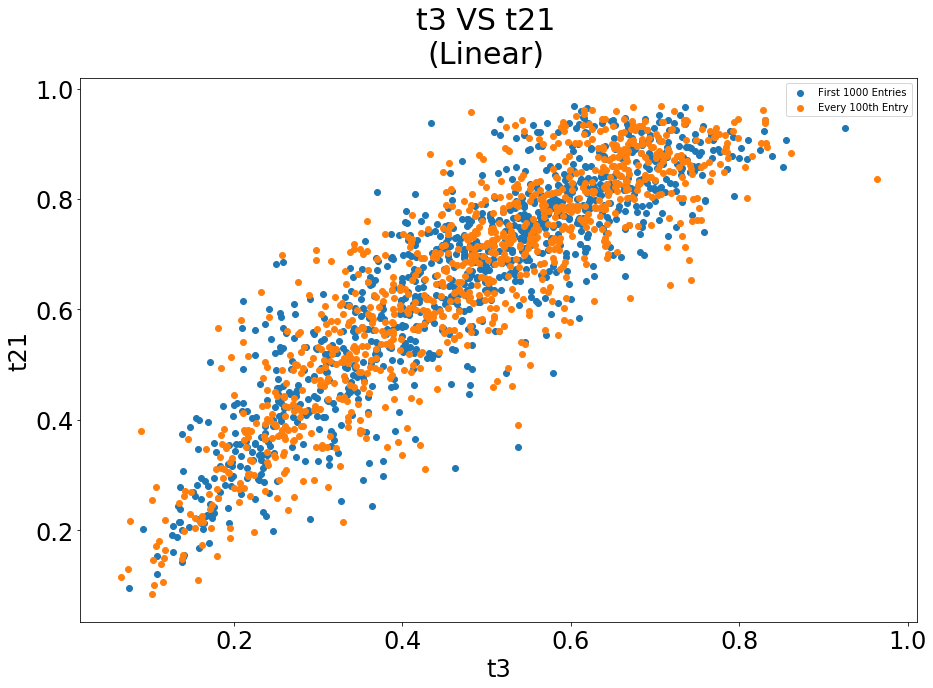

In [103]:
plt.suptitle('t3 VS t21\n(Linear)', fontsize=30)
plt.xlabel('t3', fontsize = 24)
plt.ylabel('t21', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t3'][0:1000], data_qcd['t21'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t3'][0::100], data_qcd['t21'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

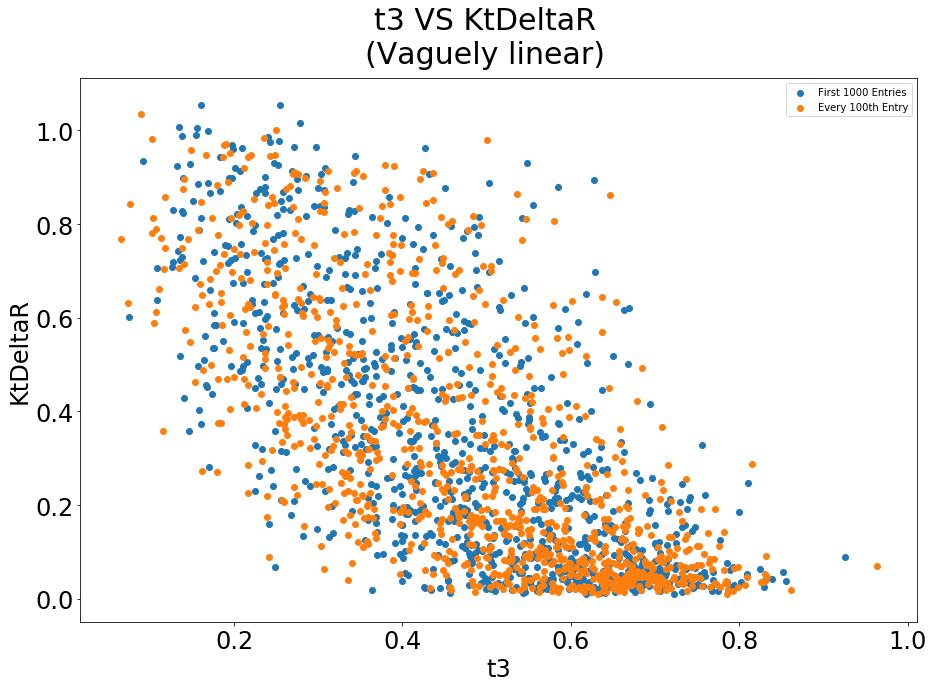

In [85]:
plt.suptitle('t3 VS KtDeltaR\n(Vaguely linear)', fontsize=30)
plt.xlabel('t3', fontsize = 24)
plt.ylabel('KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t3'][0:1000], data_qcd['KtDeltaR'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t3'][0::100], data_qcd['KtDeltaR'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

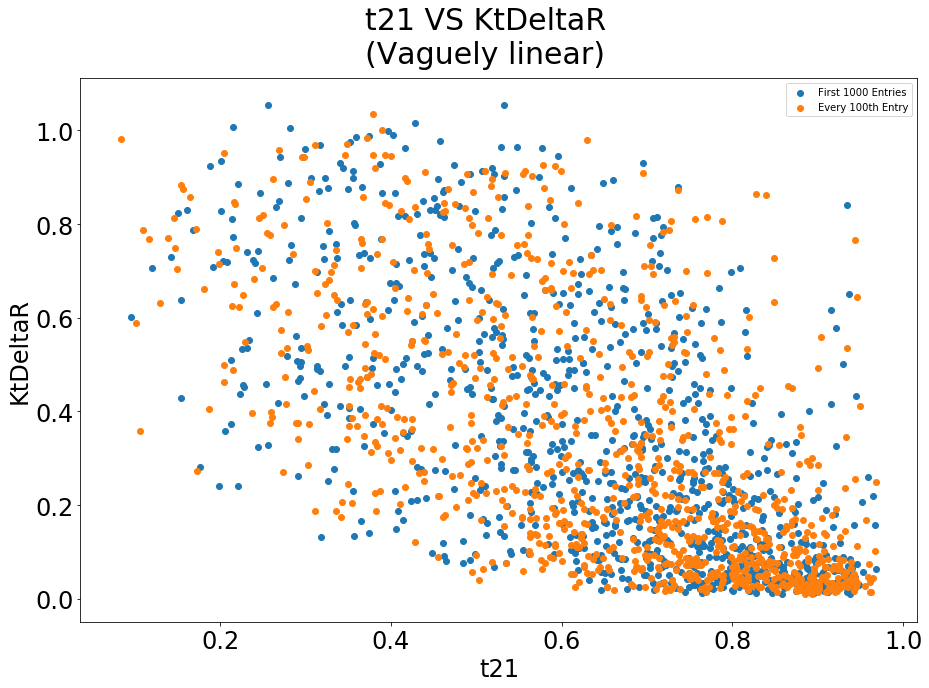

In [86]:
plt.suptitle('t21 VS KtDeltaR\n(Vaguely linear)', fontsize=30)
plt.xlabel('t21', fontsize = 24)
plt.ylabel('KtDeltaR', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data_qcd['t21'][0:1000], data_qcd['KtDeltaR'][0:1000], label = "First 1000 Entries")
plt.scatter(data_qcd['t21'][0::100], data_qcd['KtDeltaR'][0::100], label = "Every 100th Entry") 
plt.legend()
plt.show()

# 3.

To check the expected discovery sensitivity, one possible attemp is to use the distribution of the Higgs signal and the QCD background that differ the most so that signal and data are most easy to differenciate.

Let's look at mass. Since the Higgs signal form a much sharper normal distribution, we can use 2-sigma of the signal distribution as a criterion to filter data.

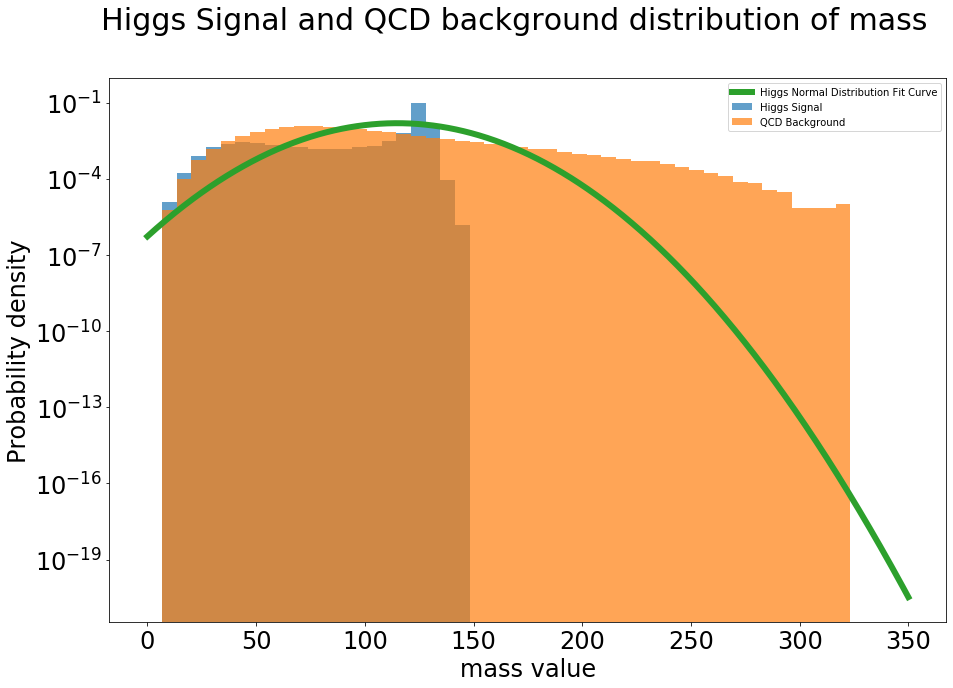

In [28]:
plt.suptitle('Higgs Signal and QCD background distribution of mass', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.hist(data_higgs['mass'], bins = np.linspace(0,330,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['mass'], bins = np.linspace(0,330,50), density = True, alpha = 0.7, label = 'QCD Background')

signal_fit = stats.norm.fit(data_higgs['mass'])
x = np.linspace(0,350,1000)
#plt.plot(x, stats.lognorm.pdf(x, bkgd_fit[0], bkgd_fit[1], bkgd_fit[2]), label = 'QCD Background Normal Distribution Fit Curve', linewidth = 6)
plt.plot(x, stats.norm.pdf(x, signal_fit[0], signal_fit[1]), label = 'Higgs Normal Distribution Fit Curve', linewidth = 6)
plt.legend()
plt.show()

We'll then find the 2-sigma values of our distribution for the signal.

In [29]:
sigma2= stats.norm.sf(2, loc=0, scale=1)
thresu = stats.norm.isf(sigma2, signal_fit[0], signal_fit[1])
thresd = stats.norm.ppf(sigma2, signal_fit[0], signal_fit[1])
print(thresu)
print(thresd)

165.59427339795718
64.19049989308503


We'll see how many mistakes we have (Signals wrongly kicked out and background wrongly included):

In [32]:
higgs_kept = 0
for i in np.arange(100000):
    if thresd < data_higgs['mass'][i] < thresu:
        higgs_kept +=1
higgs_kept

90786

In [33]:
higgs_thrown = 0
for i in np.arange(100000):
    if data_higgs['mass'][i] < thresd or data_higgs['mass'][i] > thresu:
        higgs_thrown +=1
higgs_thrown

9214

In [34]:
qcd_kept = 0
for i in np.arange(100000):
    if thresd < data_qcd['mass'][i] < thresu:
        qcd_kept +=1
qcd_kept

69920

In [35]:
qcd_thrown = 0
for i in np.arange(100000):
    if data_qcd['mass'][i] < thresd or data_qcd['mass'][i] > thresu:
        qcd_thrown +=1
qcd_thrown

30080

|            | True Higgs | True QCD |
|------------|--------|--------------|
| Kept as Higgs | 90786 | 69920           |
| Thrown out as QCD | 9214     | 30080           |

We threw away 9% of the signal but included 70% of the background. Not a very good choice if our goal is to reduce background noise as much as possible.

It would appear that if we were to use mass as a single criterion for expected discovery sensitivity, and using 2-sigma of the signal mass distribution as a criterion, we would end up including lots of garbage background.

# 4

The good news is that mass is not our only criterion for differentiating Higgs data from the background.

pT, ee2, t21, and KtDeltaR all have distributions that have very different plots for signal and background. 
<br>We will not be using t2 and t3 despite the background/data plots are very different because the number of jets can only be confidently confirmed if their ratio with the previous subjettiness (such as t21) is small.

One plan to optimize discovery sensitivity is to use these 5 most discriminating data (including the mass) together to select the signal from the background.
<br>Each entry is only considered a signal if it falls within the threashold for all 5 criterion.

In [37]:
signal_fit = stats.norm.fit(data_higgs['pt'])
sigma2= stats.norm.sf(2, loc=0, scale=1)
thresu_pt = stats.norm.isf(sigma2, signal_fit[0], signal_fit[1])
thresd_pt = stats.norm.ppf(sigma2, signal_fit[0], signal_fit[1])
print(thresu_pt)
print(thresd_pt)

536.9283878887521
357.844858003638


In [38]:
signal_fit = stats.norm.fit(data_higgs['ee2'])
sigma2= stats.norm.sf(2, loc=0, scale=1)
thresu_ee2 = stats.norm.isf(sigma2, signal_fit[0], signal_fit[1])
thresd_ee2 = stats.norm.ppf(sigma2, signal_fit[0], signal_fit[1])
print(thresu_ee2)
print(thresd_ee2)

0.21226785516041785
0.03899235147288865


In [39]:
signal_fit = stats.norm.fit(data_higgs['t21'])
sigma2= stats.norm.sf(2, loc=0, scale=1)
thresu_t21 = stats.norm.isf(sigma2, signal_fit[0], signal_fit[1])
thresd_t21 = stats.norm.ppf(sigma2, signal_fit[0], signal_fit[1])
print(thresu_t21)
print(thresd_t21)

0.7468825775484096
-0.050504276958754424


In [41]:
signal_fit = stats.norm.fit(data_higgs['KtDeltaR'])
sigma2= stats.norm.sf(2, loc=0, scale=1)
thresu_KtDeltaR = stats.norm.isf(sigma2, signal_fit[0], signal_fit[1])
thresd_KtDeltaR = stats.norm.ppf(sigma2, signal_fit[0], signal_fit[1])
print(thresu_KtDeltaR)
print(thresd_KtDeltaR)

0.9391104180811598
0.1140483238605628


In [45]:
test_higgs = 0
for i in np.arange(100000):
    if thresd < data_higgs['mass'][i] < thresu:
        if thresd_pt < data_higgs['pt'][i] < thresu_pt:
            if thresd_ee2 < data_higgs['ee2'][i] < thresu_ee2:
                if thresd_t21 < data_higgs['t21'][i] < thresu_t21:
                    if thresd_KtDeltaR < data_higgs['KtDeltaR'][i] < thresu_KtDeltaR:
                        test_higgs += 1
print (test_higgs)

83457


In [43]:
test_qcd = 0
for i in np.arange(100000):
    if thresd < data_qcd['mass'][i] < thresu:
        if thresd_pt < data_qcd['pt'][i] < thresu_pt:
            if thresd_ee2 < data_qcd['ee2'][i] < thresu_ee2:
                if thresd_t21 < data_qcd['t21'][i] < thresu_t21:
                    if thresd_KtDeltaR < data_qcd['KtDeltaR'][i] < thresu_KtDeltaR:
                        test_qcd += 1
print (test_qcd)

40961


|            | True Higgs | True QCD |
|------------|--------|--------------|
| Kept as Higgs | 83457 | 40961           |
| Thrown out as QCD | 16543     | 59039          |

It appears that 83.45% of our signal has been properly captured, but we still included 41% of the background.

We lost a little more of our signal data (7 percentiles), but we successfully eradicated 28.9 percentile of the background QCD contamination.
In conclusion, this simple attempt of trying to optimize discovery sensitivity by selecting the features **mass, pT, ee2, t21** and **KtDeltaR** is somewhat quite successful.

# ---End of Lab 05---